<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  

# ***Integrating MLOps for Predictive and Recommender Systems in Travel***



##### **Project Type**    - Productionization of ML Systems


##### **Contribution**    - Individual


# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **Project Objectives**

**1. Regression Model Development:**

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

**2. REST API for Regression Model:**

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

**3. Containerization:**

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

**4. Kubernetes for Scalability:**

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

**5. Automated Workflows with Apache Airflow:**

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

**6. CI/CD Pipeline with Jenkins:**

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model.

**7. Model Tracking with MLFlow:**

Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.

**8. Gender Classification Model:**

Deploy a classification model to categorize a user's gender.

**9. Travel Recommendation Model:**

Build a recommendation model to provide hotel suggestions based on user preferences and historical data. Develop a Streamlit web application to display insights and visualizations derived from the deployed travel recommendation model, offering an interactive and user-friendly interface for data exploration.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
flights_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/flights.csv")
hotels_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/hotels.csv")
users_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/users.csv")

### Dataset First View

In [6]:
# Dataset First Look
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019

In [7]:
flights_df.tail()

travelCode  userCode                 from                   to  \
271883      135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884      135942      1339   Florianopolis (SC)           Natal (RN)   
271885      135942      1339           Natal (RN)   Florianopolis (SC)   
271886      135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887      135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType    price  time  distance   agency        date  
271883  firstClass  1446.34  1.49    573.81  CloudFy  07/12/2020  
271884    economic   726.95  1.84    709.37  CloudFy  07/16/2020  
271885    economic   873.07  1.84    709.37  CloudFy  07/20/2020  
271886    economic   313.62  1.21    466.30  CloudFy  07/23/2020  
271887    economic   533.69  1.21    466.30  CloudFy  07/26/2020

**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [8]:
hotels_df.head()

travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019

In [9]:
hotels_df.tail()

travelCode  userCode      name              place  days   price  \
40547      135938      1339  Hotel BP      Brasilia (DF)     3  247.62   
40548      135939      1339  Hotel BP      Brasilia (DF)     1  247.62   
40549      135940      1339  Hotel BW  Campo Grande (MS)     3   60.39   
40550      135941      1339  Hotel BW  Campo Grande (MS)     3   60.39   
40551      135942      1339  Hotel BD         Natal (RN)     4  242.88   

        total        date  
40547  742.86  06/18/2020  
40548  247.62  06/25/2020  
40549  181.17  07/02/2020  
40550  181.17  07/09/2020  
40551  971.52  07/16/2020

**Hotels Dataset:**

travelCode: Identifier for the travel, similar to the Flights dataset.

userCode: User identifier(linked to the Users dataset)

name: Name of the hotel.

place: Location of the hotel.

days: Number of days of the hotel stay.

price: Price per day.

total: Total price for the stay.

date: Date of the hotel booking.

In [10]:
users_df.head()

code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44

In [11]:
users_df.tail()

code        company              name  gender  age
1335  1335  Umbrella LTDA  Albert Garroutte    male   23
1336  1336  Umbrella LTDA        Kim Shores  female   40
1337  1337  Umbrella LTDA     James Gimenez    male   28
1338  1338  Umbrella LTDA      Viola Agosta  female   52
1339  1339  Umbrella LTDA    Paul Rodriguez    male   35

**Users Dataset:**

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [13]:
hotels_df.shape

(40552, 8)

In [14]:
users_df.shape

(1340, 5)

### Dataset Information

In [15]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [16]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
flights_df.duplicated().sum()

0

In [19]:
hotels_df.duplicated().sum()

0

In [20]:
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [21]:
# Missing Values/Null Values Count
flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [22]:
hotels_df.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [23]:
users_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [25]:
hotels_df.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [26]:
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [27]:
# Dataset Describe
flights_df.describe()

travelCode       userCode         price           time  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503       1.421147   
std     39243.724665     389.523127     362.31189       0.542541   
min         0.000000       0.000000     301.51000       0.440000   
25%     33985.750000     326.000000     672.66000       1.040000   
50%     67971.500000     659.000000     904.00000       1.460000   
75%    101957.250000    1011.000000    1222.24000       1.760000   
max    135943.000000    1339.000000    1754.17000       2.440000   

            distance  
count  271888.000000  
mean      546.955535  
std       208.851288  
min       168.220000  
25%       401.660000  
50%       562.140000  
75%       676.530000  
max       937.770000

In [28]:
hotels_df.describe()

travelCode      userCode          days         price         total
count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000
mean    67911.794461    666.963726      2.499679    214.439554    536.229513
std     39408.199333    391.136794      1.119326     76.742305    319.331482
min         0.000000      0.000000      1.000000     60.390000     60.390000
25%     33696.750000    323.000000      1.000000    165.990000    247.620000
50%     67831.000000    658.000000      2.000000    242.880000    495.240000
75%    102211.250000   1013.000000      4.000000    263.410000    742.860000
max    135942.000000   1339.000000      4.000000    313.020000   1252.080000

In [29]:
users_df.describe()

code          age
count  1340.000000  1340.000000
mean    669.500000    42.742537
std     386.968991    12.869779
min       0.000000    21.000000
25%     334.750000    32.000000
50%     669.500000    42.000000
75%    1004.250000    54.000000
max    1339.000000    65.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
flights_df.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64

In [31]:
hotels_df.nunique()

travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
dtype: int64

In [32]:
users_df.nunique()

code       1340
company       5
name       1338
gender        3
age          45
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:
# Write your code to make your dataset analysis ready.
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019

**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [34]:
flights_df['from'].value_counts()

from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [35]:
flights_df['to'].value_counts()

to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [36]:
flights_df['flightType'].value_counts()

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

In [37]:
flights_df['agency'].value_counts()

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

In [38]:
flights_df['route']=flights_df['from']+'-'+flights_df['to']

In [39]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  \
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019   
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019   
2  1487.52  1.66    637.56      CloudFy  10/03/2019   
3  1127.36  1.66    637.56      CloudFy  10/04/2019   
4  1684.05  2.16    830.86      CloudFy  10/10/2019   

                              route  
0    Recife (PE)-Florianopolis (SC)  
1    Florianopolis (SC)-Recife (PE)  
2  Brasilia (DF)-Florianopolis (SC)  
3  Florianopolis (SC)-Brasilia (DF)  
4        Aracaju (SE)-Salvador (BH)

In [40]:
flights_df['route'].value_counts()

route
Florianopolis (SC)-Aracaju (SE)         8643
Aracaju (SE)-Florianopolis (SC)         8643
Florianopolis (SC)-Campo Grande (MS)    8253
Campo Grande (MS)-Florianopolis (SC)    8253
Brasilia (DF)-Florianopolis (SC)        7779
                                        ... 
Natal (RN)-Rio de Janeiro (RJ)           950
Rio de Janeiro (RJ)-Sao Paulo (SP)       934
Sao Paulo (SP)-Rio de Janeiro (RJ)       934
Salvador (BH)-Natal (RN)                 926
Natal (RN)-Salvador (BH)                 926
Name: count, Length: 70, dtype: int64

In [41]:
def convert_time(time):
  hour=int(time)
  minute=time-hour
  totalmin=int(hour*60)+int(minute*100)
  return totalmin

In [42]:
convert_time(1.66)

125

In [43]:
flights_df['total_time']=flights_df['time'].apply(convert_time)

In [44]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  \
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019   
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019   
2  1487.52  1.66    637.56      CloudFy  10/03/2019   
3  1127.36  1.66    637.56      CloudFy  10/04/2019   
4  1684.05  2.16    830.86      CloudFy  10/10/2019   

                              route  total_time  
0    Recife (PE)-Florianopolis (SC)         136  
1    Florianopolis (SC)-Recife (PE)         136  
2  Brasilia (DF)-Florianopolis (SC)         125  
3  Florianopolis (SC)-Brasilia (DF)         125  
4        Aracaju (SE)-Salvador (BH)         136

In [45]:
flights_df.tail()

travelCode  userCode                 from                   to  \
271883      135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884      135942      1339   Florianopolis (SC)           Natal (RN)   
271885      135942      1339           Natal (RN)   Florianopolis (SC)   
271886      135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887      135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType    price  time  distance   agency        date  \
271883  firstClass  1446.34  1.49    573.81  CloudFy  07/12/2020   
271884    economic   726.95  1.84    709.37  CloudFy  07/16/2020   
271885    economic   873.07  1.84    709.37  CloudFy  07/20/2020   
271886    economic   313.62  1.21    466.30  CloudFy  07/23/2020   
271887    economic   533.69  1.21    466.30  CloudFy  07/26/2020   

                                         route  total_time  
271883    Campo Grande (MS)-Florianopolis (SC)         109  
271884           Florianopolis (SC)-Natal (RN)         144  
271885           Natal (RN)-Florianopolis (SC)         144  
271886  Florianopolis (SC)-Rio de Janeiro (RJ)          80  
271887  Rio de Janeiro (RJ)-Florianopolis (SC)          80

In [46]:
flights_df['date'] = pd.to_datetime(flights_df['date'])

In [47]:
flights_df['weekday_num']   = flights_df.date.dt.weekday
flights_df['month']         = flights_df.date.dt.month
flights_df['year']          = flights_df.date.dt.year
flights_df['weekday']=flights_df['date'].dt.day_name()

In [48]:
#Calculate Speed in km/hr for further insights
flights_df['speed'] = (flights_df.distance/(flights_df.total_time/60))

In [49]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

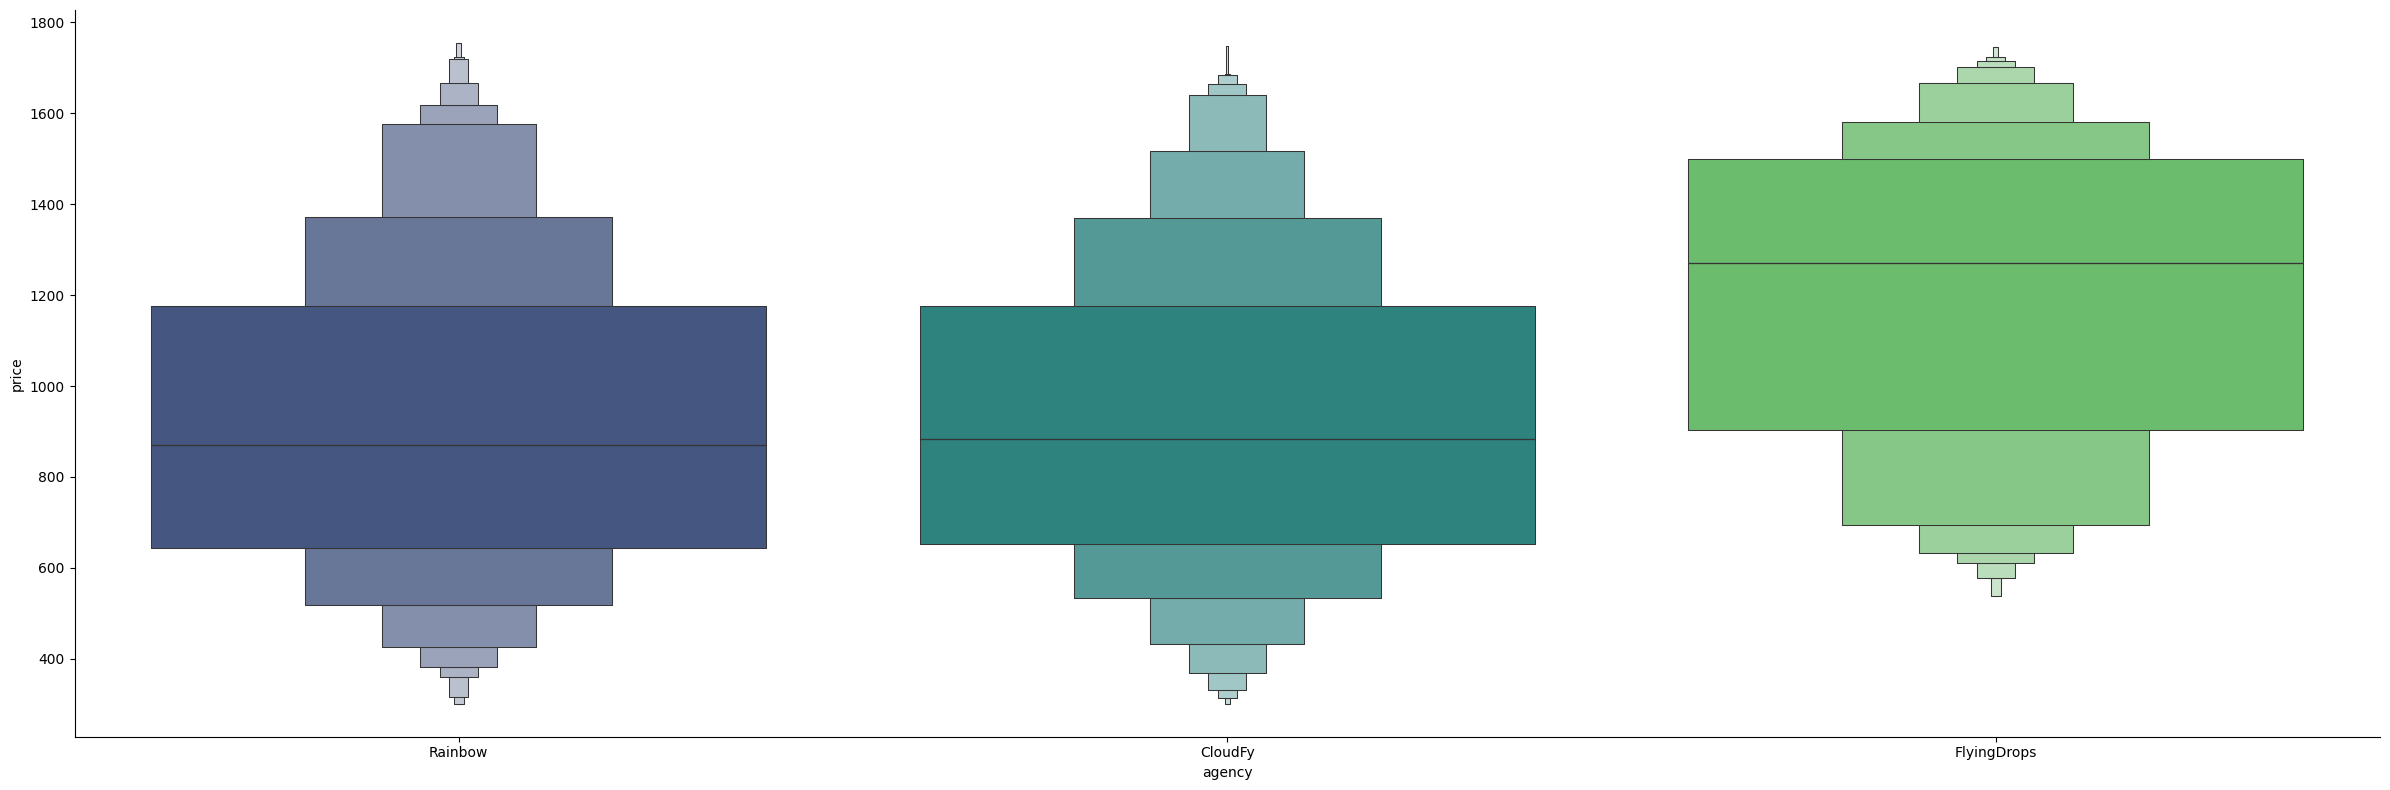

In [50]:
# Chart - 1 visualization

sns.catplot(y = "price", x = "agency", data = flights_df.sort_values("price", ascending = False), kind="boxen", height = 8, aspect = 3,hue='agency',palette="viridis")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [51]:
agency_counts = flights_df['agency'].value_counts()

In [52]:
agency_counts

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

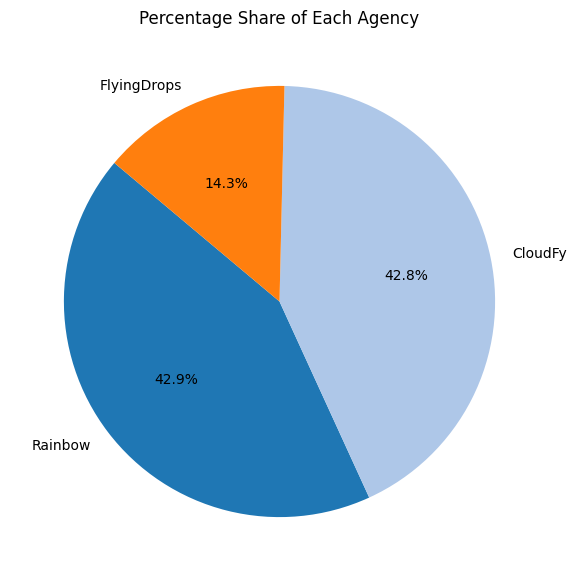

In [53]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 7))
plt.pie(agency_counts, labels=agency_counts.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Agency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [54]:
flight_counts = flights_df['from'].value_counts().reset_index()
flight_counts.columns = ['airportname', 'total_flights']

In [55]:
flight_counts

airportname  total_flights
0   Florianopolis (SC)          57317
1         Aracaju (SE)          37224
2    Campo Grande (MS)          34748
3        Brasilia (DF)          30779
4          Recife (PE)          30480
5           Natal (RN)          23796
6       Sao Paulo (SP)          23625
7        Salvador (BH)          17104
8  Rio de Janeiro (RJ)          16815

In [56]:
# Chart - 3 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

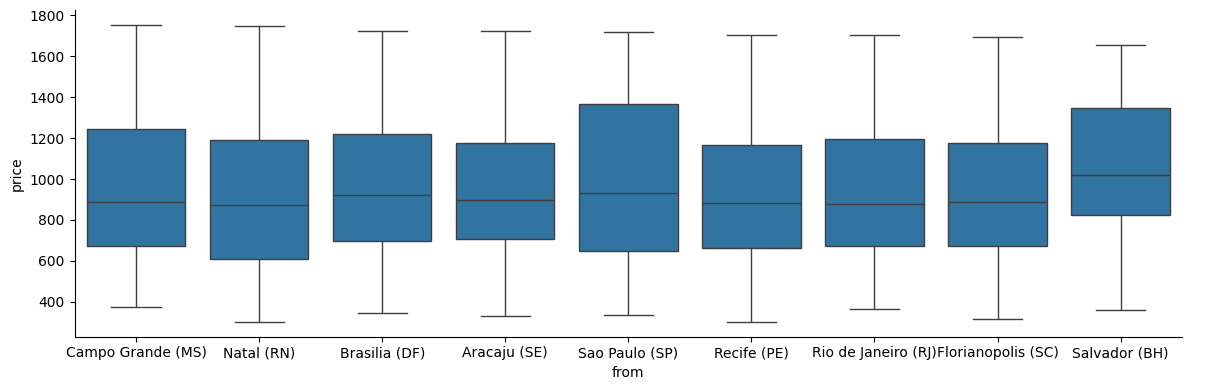

In [57]:
# Chart - 4 visualization code
sns.catplot(y = "price", x = "from", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

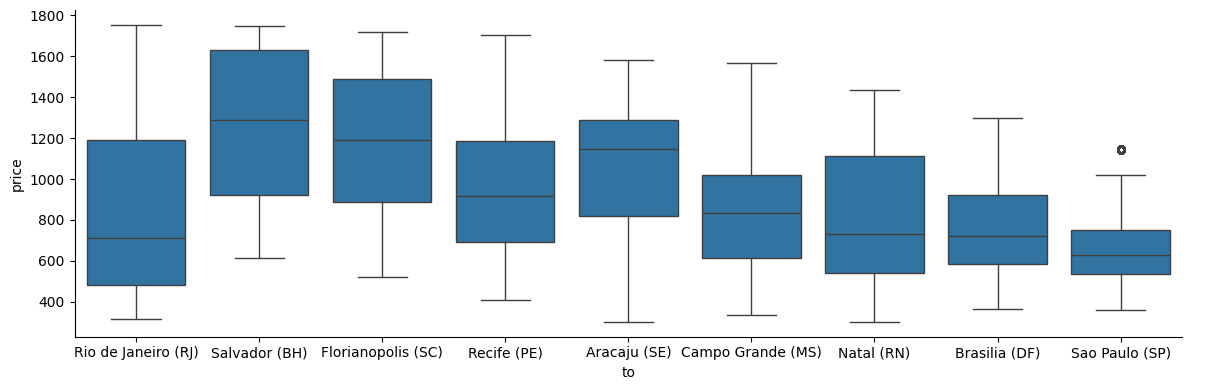

In [58]:
# Chart - 5 visualization code
sns.catplot(y = "price", x = "to", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [59]:
type_count=flights_df['flightType'].value_counts()

In [60]:
type_count

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

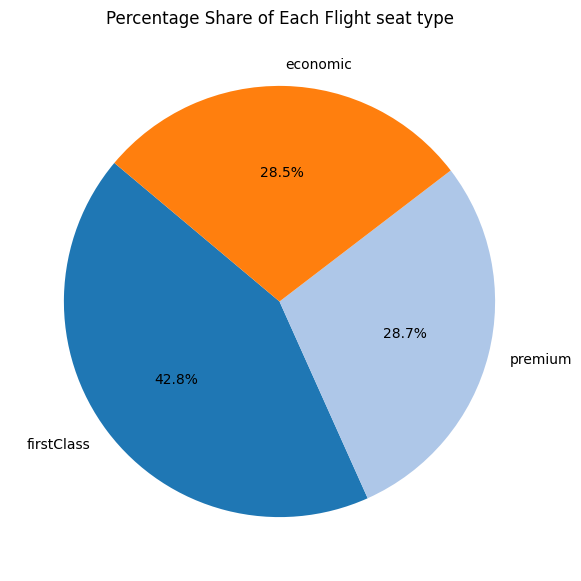

In [61]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 7))
plt.pie(type_count, labels=type_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Flight seat type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

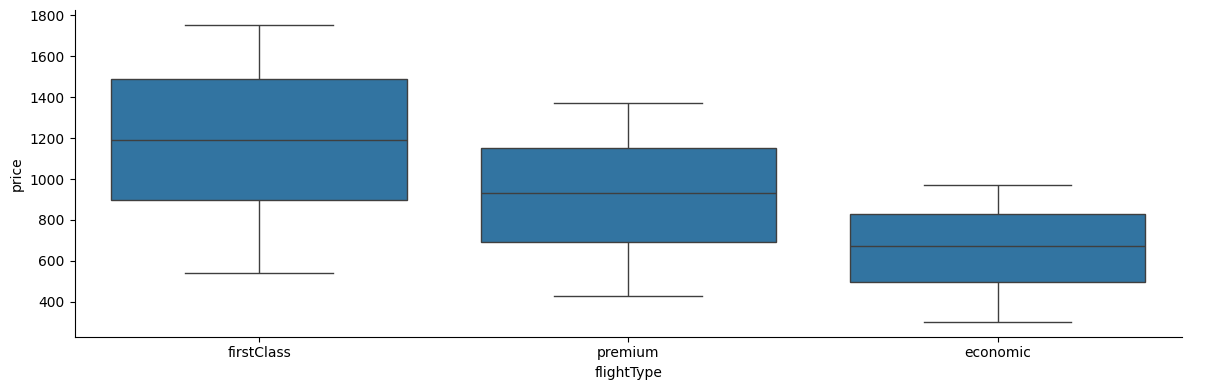

In [62]:
# Chart - 7 visualization code
sns.catplot(y = "price", x = "flightType", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

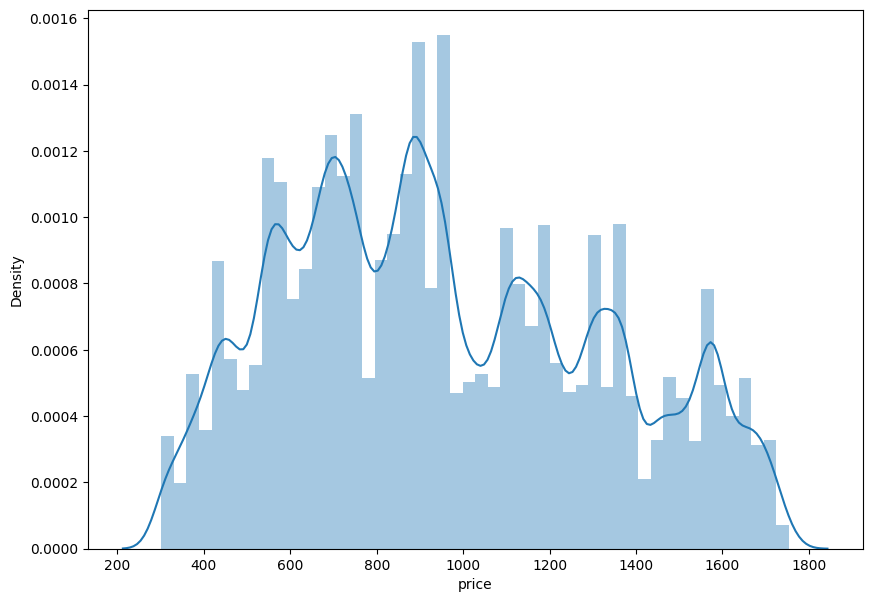

In [63]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['price'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [64]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

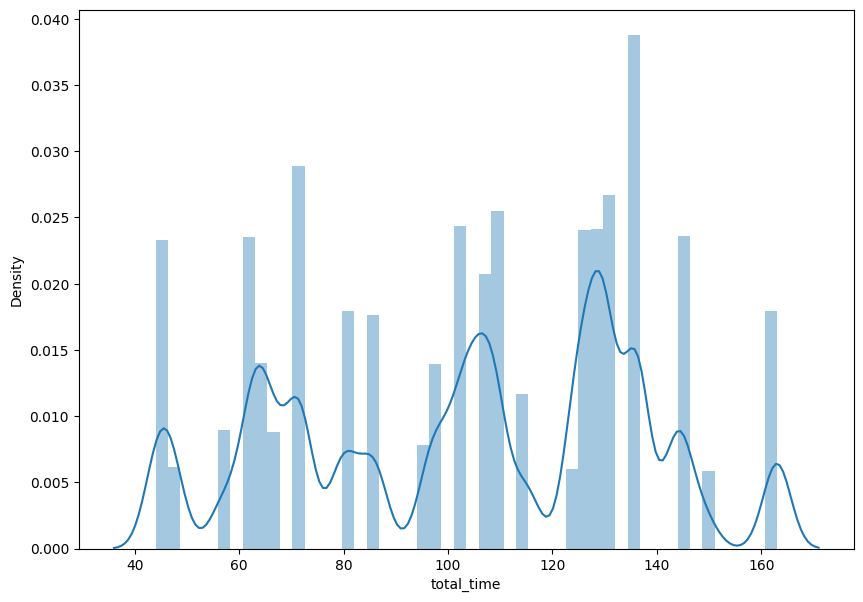

In [65]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['total_time'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [66]:
flights_df['distance'].max()

937.77

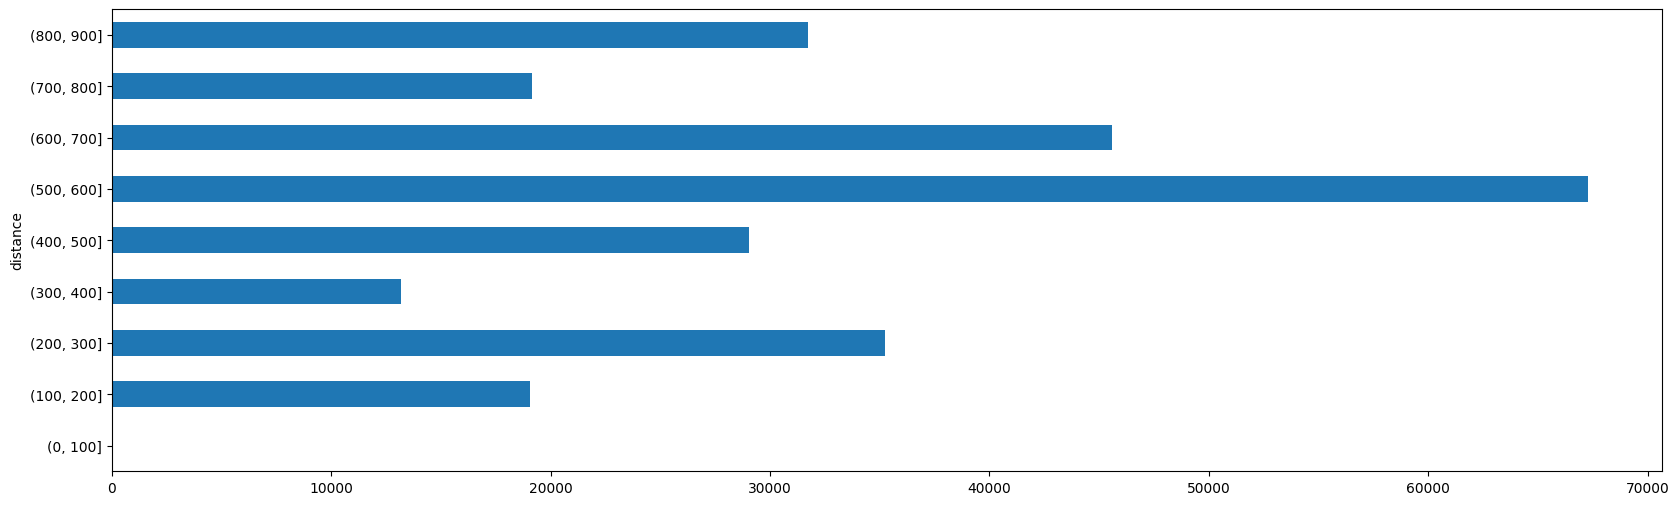

In [67]:
flights_df.distance.groupby(pd.cut(flights_df.distance, np.arange(0,1000,100))).count().plot(kind='barh',figsize = (20,6))
plt.show()

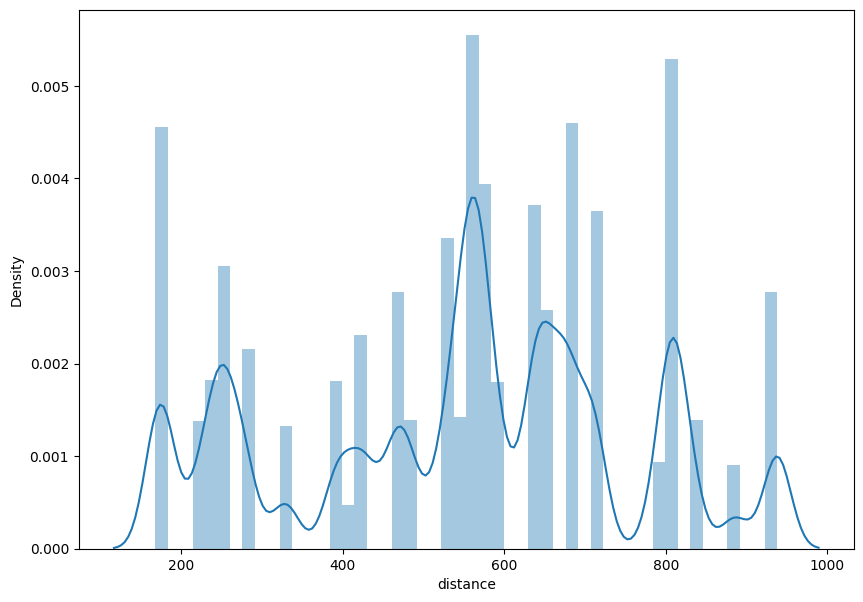

In [68]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['distance'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

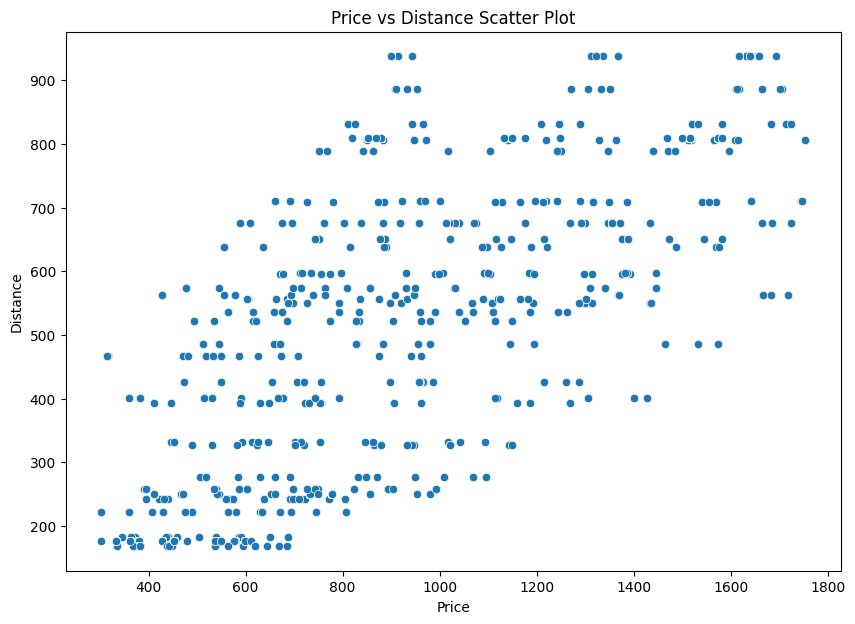

In [69]:
# Chart - 11 visualization code
# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="distance", data=flights_df)
plt.xlabel("Price")
plt.ylabel("Distance")
plt.title("Price vs Distance Scatter Plot")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [70]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

In [71]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

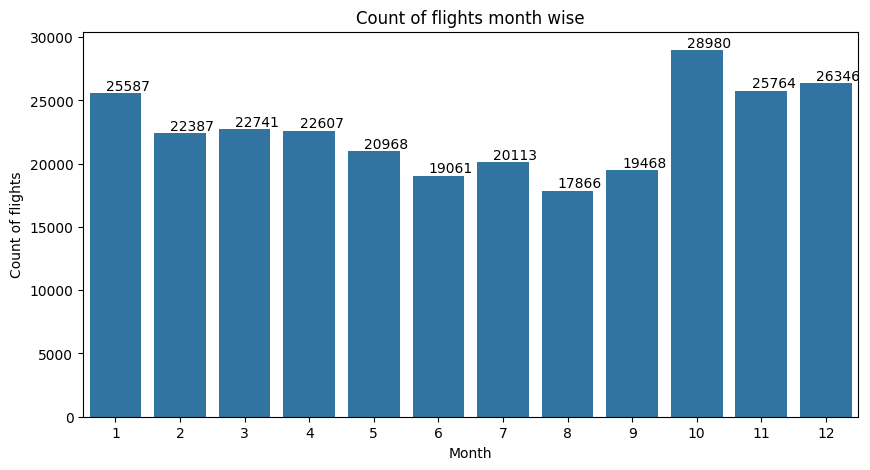

In [72]:
# Chart - 12 visualization code
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month', data = flights_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

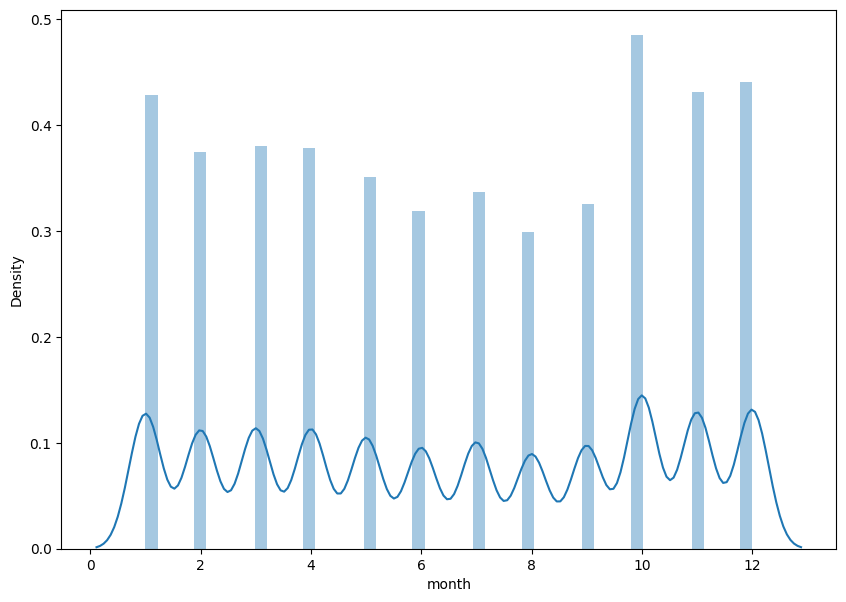

In [73]:
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['month'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

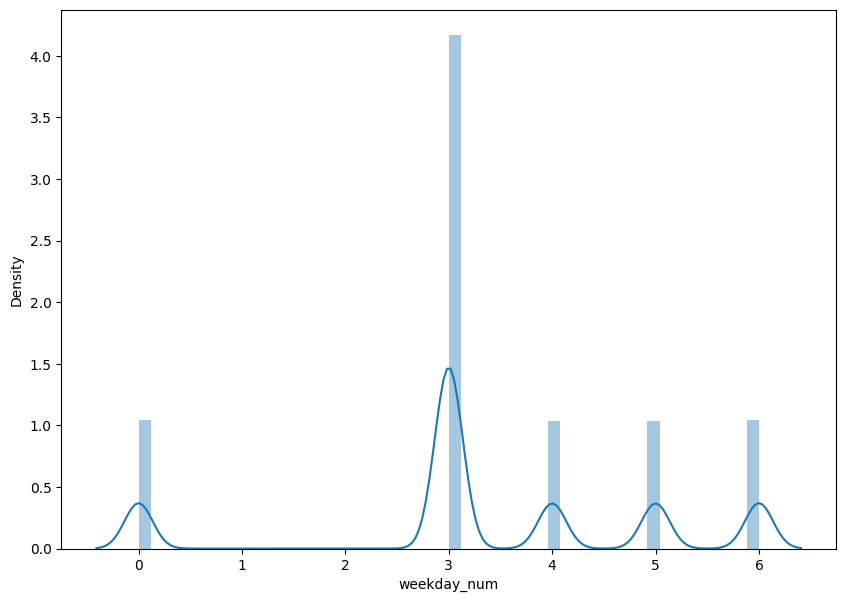

In [74]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['weekday_num'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [75]:
columns_to_drop = ['time', 'date']
flights_df1 = flights_df.drop(columns=columns_to_drop)

In [76]:
flights_df1.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  weekday_num  month  year   weekday       speed  
0         136            3      9  2019  Thursday  298.469118  
1         136            0      9  2019    Monday  298.469118  
2         125            3     10  2019  Thursday  306.028800  
3         125            4     10  2019    Friday  306.028800  
4         136            3     10  2019  Thursday  366.555882

In [77]:
flights_df1.corr(numeric_only=True)


travelCode  userCode     price  distance  total_time  \
travelCode     1.000000  0.999894  0.135749  0.310703    0.340019   
userCode       0.999894  1.000000  0.137282  0.313996    0.343315   
price          0.135749  0.137282  1.000000  0.641915    0.631045   
distance       0.310703  0.313996  0.641915  1.000000    0.955154   
total_time     0.340019  0.343315  0.631045  0.955154    1.000000   
weekday_num   -0.000484 -0.000521  0.016060 -0.002558   -0.002438   
month          0.003233  0.003260 -0.000013  0.000942    0.001283   
year          -0.000528 -0.001322  0.007291  0.008011    0.008064   
speed          0.158926  0.161047  0.418726  0.709277    0.493377   

             weekday_num     month      year     speed  
travelCode     -0.000484  0.003233 -0.000528  0.158926  
userCode       -0.000521  0.003260 -0.001322  0.161047  
price           0.016060 -0.000013  0.007291  0.418726  
distance       -0.002558  0.000942  0.008011  0.709277  
total_time     -0.002438  0.001283  0.008064  0.493377  
weekday_num     1.000000 -0.005024  0.000952 -0.002153  
month          -0.005024  1.000000 -0.355074  0.000454  
year            0.000952 -0.355074  1.000000  0.005134  
speed          -0.002153  0.000454  0.005134  1.000000

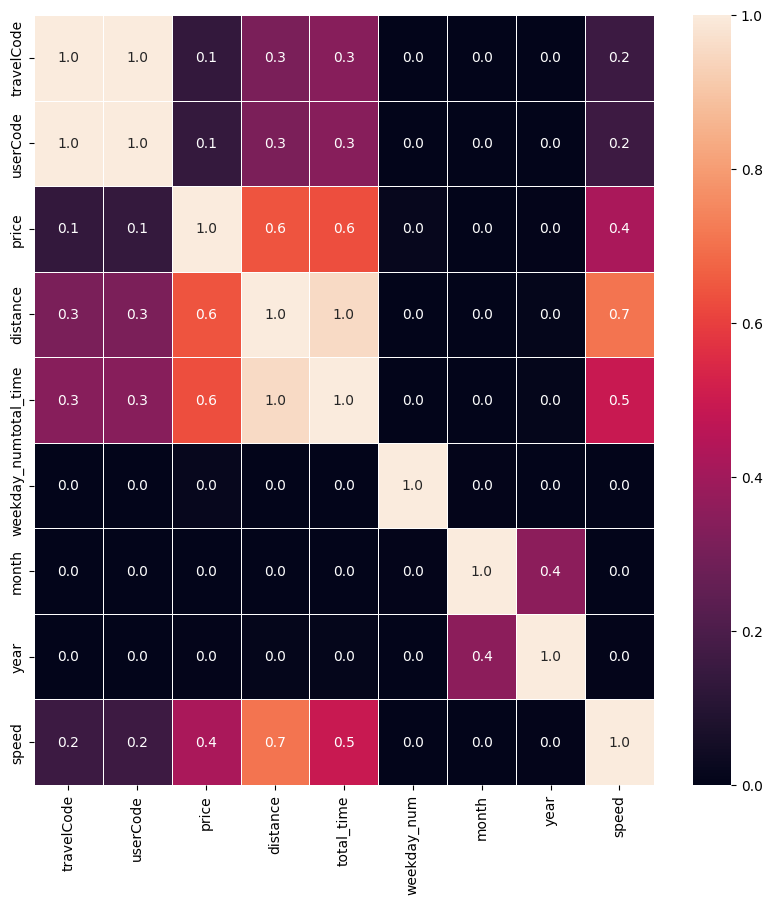

In [78]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(round(flights_df1.corr(numeric_only=True),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

<Figure size 1000x1000 with 0 Axes>

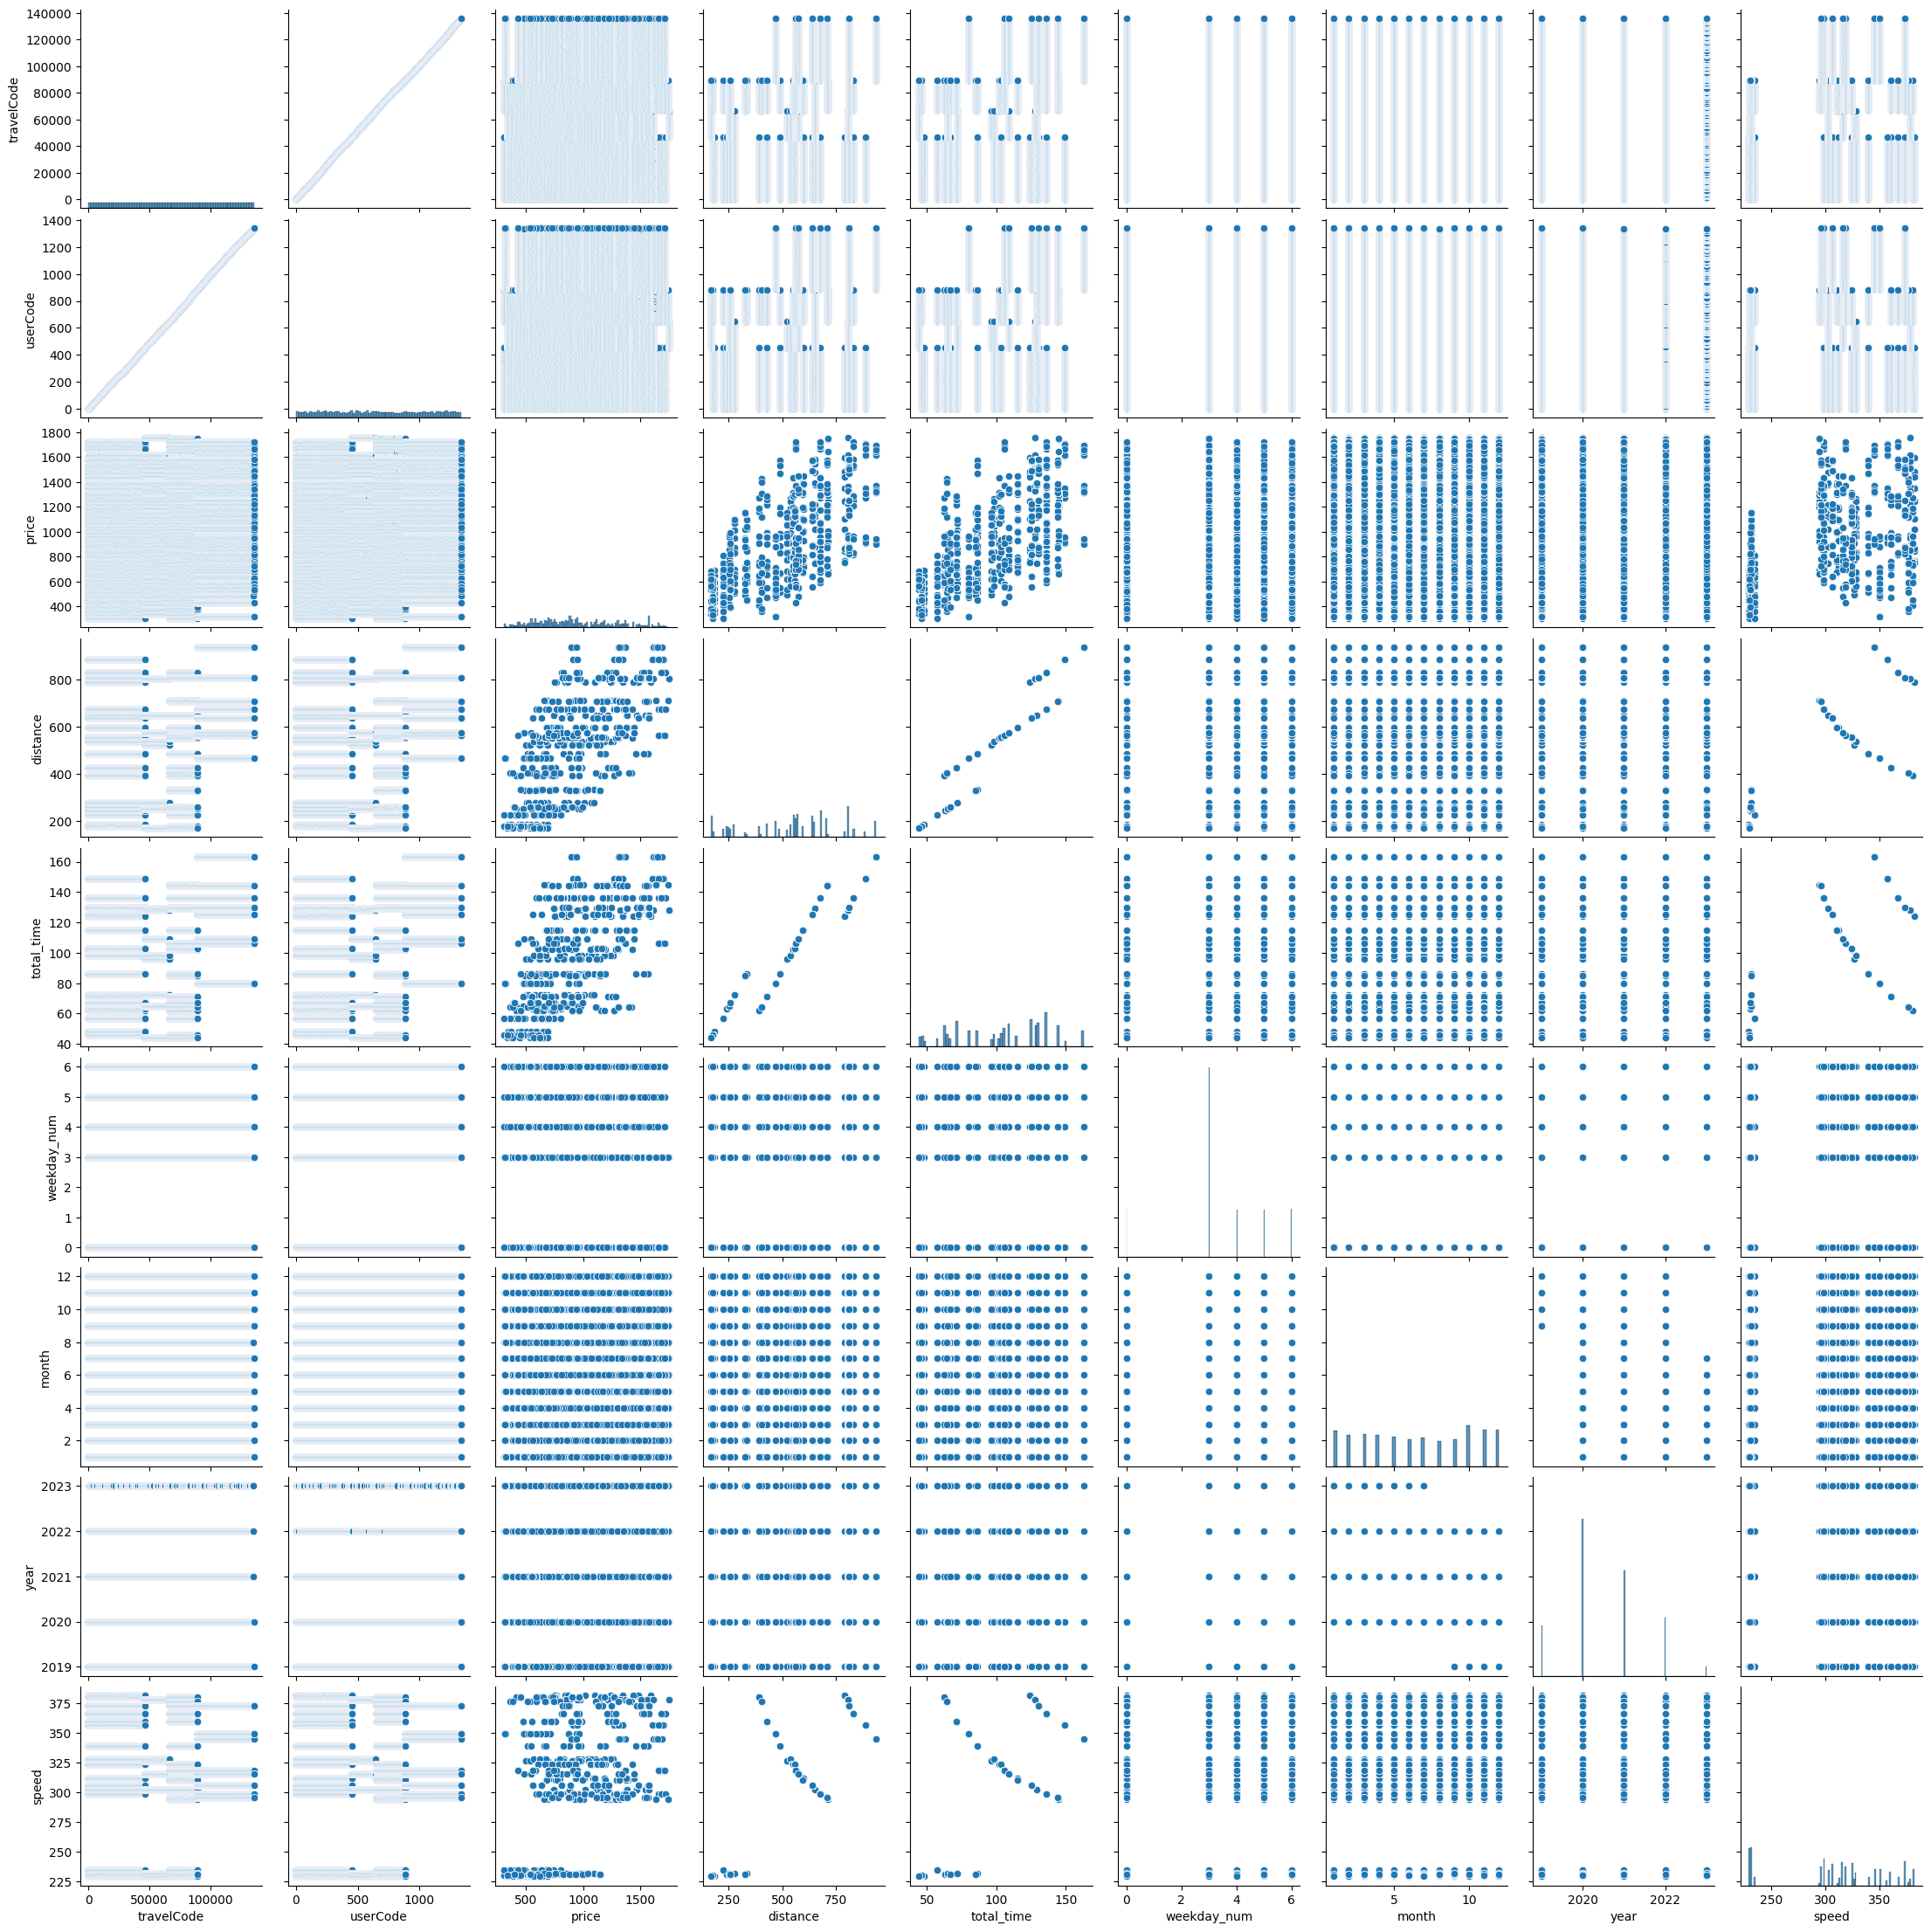

In [79]:
# Pair Plot visualization code
plt.figure(figsize=(10, 10))
sns.pairplot(flights_df1)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [80]:
flights_df1.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  weekday_num  month  year   weekday       speed  
0         136            3      9  2019  Thursday  298.469118  
1         136            0      9  2019    Monday  298.469118  
2         125            3     10  2019  Thursday  306.028800  
3         125            4     10  2019    Friday  306.028800  
4         136            3     10  2019  Thursday  366.555882

### Hypothetical Statement - 1 The average flight price is greater than $200.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average flight price is less than or equal to $200.**

**Alternative Hypothesis (H1): The average flight price is greater than $200.**

#### 2. Perform an appropriate statistical test.

**One-sample t-test: Is the average flight price > $200?**

**Null Hypothesis (H0): μ <= 200**

**Alternative Hypothesis (H1): μ > 200**

In [81]:
# Perform Statistical Test to obtain P-Value

mu = 200
t_stat, p_value = stats.ttest_1samp(flights_df1['price'], mu)
print(f"T-statistic: {t_stat}, P-value: {p_value/2}")

if p_value/2 < 0.05:
    print("Reject the null hypothesis. The average flight price is greater than $200.")

T-statistic: 1089.992265506749, P-value: 0.0
Reject the null hypothesis. The average flight price is greater than $200.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2 The average flight duration is different for flights above and below 600 km.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average flight duration is the same for flights above and below 600 km.**

**Alternative Hypothesis (H1): The average flight duration is different for flights above and below 600 km.**

#### 2. Perform an appropriate statistical test.

**Two-sample t-test: Is the average time different for flights above and below 600 km?**

**Null Hypothesis (H0): μ_above = μ_below**

**Alternative Hypothesis (H1): μ_above ≠ μ_below**

In [82]:
# Perform Statistical Test to obtain P-Value


above_600 = flights_df1[flights_df1['distance'] > 600]['total_time']
below_600 = flights_df1[flights_df1['distance'] <= 600]['total_time']

t_stat, p_value = stats.ttest_ind(above_600, below_600)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. The average flight duration is different for flights above and below 600 km.")

T-statistic: 752.0505562411363, P-value: 0.0
Reject the null hypothesis. The average flight duration is different for flights above and below 600 km.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3 correlation between flight price and distance



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no correlation between flight price and distance (correlation coefficient = 0).**

**Alternative Hypothesis (H1): There is a correlation between flight price and distance (correlation coefficient ≠ 0).**

#### 2. Perform an appropriate statistical test.

**Pearson correlation test: Is there a correlation between price and distance?**

**Null Hypothesis (H0): ρ = 0**

**Alternative Hypothesis (H1): ρ ≠ 0**

In [83]:
# Perform Statistical Test to obtain P-Value

correlation, p_value = stats.pearsonr(flights_df1['price'], flights_df1['distance'])
print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a correlation between flight price and distance.")

Correlation: 0.6419153216454421, P-value: 0.0
Reject the null hypothesis. There is a correlation between flight price and distance.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [84]:
# Handling Missing Values & Missing Value Imputation
flights_df1.isnull().sum()

travelCode     0
userCode       0
from           0
to             0
flightType     0
price          0
distance       0
agency         0
route          0
total_time     0
weekday_num    0
month          0
year           0
weekday        0
speed          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [85]:
# Handling Outliers & Outlier treatments
flights_df1.describe()

travelCode       userCode         price       distance  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503     546.955535   
std     39243.724665     389.523127     362.31189     208.851288   
min         0.000000       0.000000     301.51000     168.220000   
25%     33985.750000     326.000000     672.66000     401.660000   
50%     67971.500000     659.000000     904.00000     562.140000   
75%    101957.250000    1011.000000    1222.24000     676.530000   
max    135943.000000    1339.000000    1754.17000     937.770000   

          total_time    weekday_num          month           year  \
count  271888.000000  271888.000000  271888.000000  271888.000000   
mean      103.667701       3.373521       6.607519    2020.522862   
std        32.426429       1.655530       3.606611       0.980161   
min        44.000000       0.000000       1.000000    2019.000000   
25%        72.000000       3.000000       3.000000    2020.000000   
50%       106.000000       3.000000       7.000000    2020.000000   
75%       130.000000       4.000000      10.000000    2021.000000   
max       163.000000       6.000000      12.000000    2023.000000   

               speed  
count  271888.000000  
mean      309.101486  
std        48.348115  
min       229.212500  
25%       295.570833  
50%       315.858716  
75%       345.191411  
max       381.556452

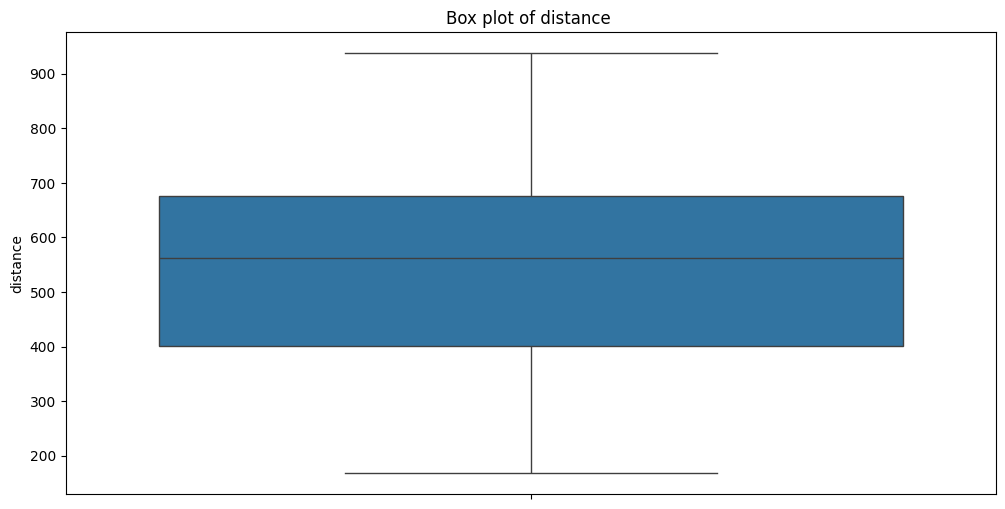

In [86]:
plt.figure(figsize=(12,6))
plt.title("Box plot of distance ")
ax = sns.boxplot(data=flights_df1['distance'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

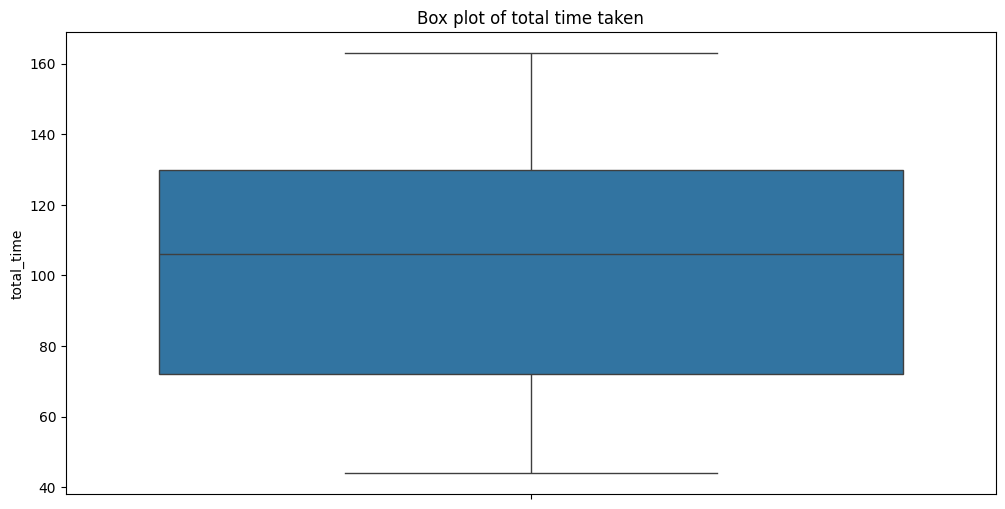

In [87]:
plt.figure(figsize=(12,6))
plt.title("Box plot of total time taken")
ax = sns.boxplot(data=flights_df1['total_time'])

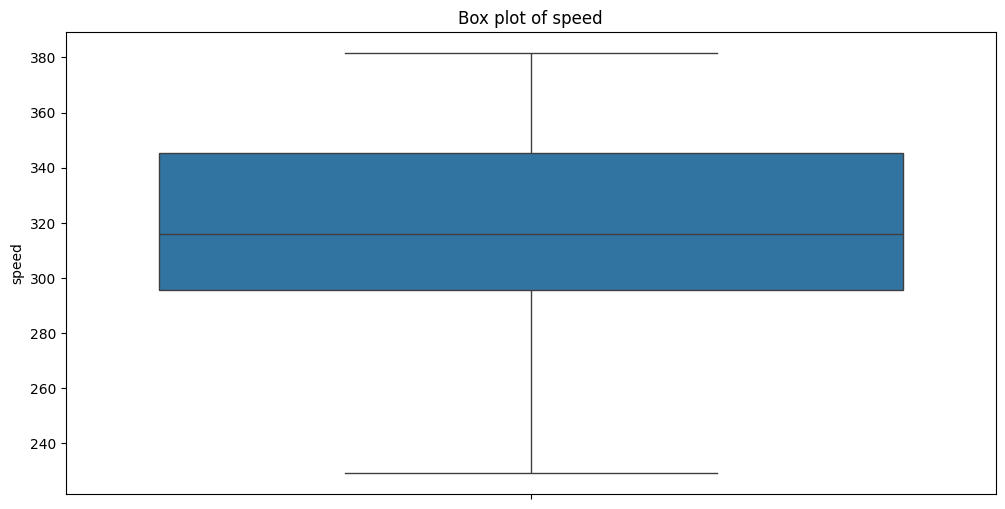

In [88]:
plt.figure(figsize=(12,6))
plt.title("Box plot of speed")
ax = sns.boxplot(data=flights_df1['speed'])

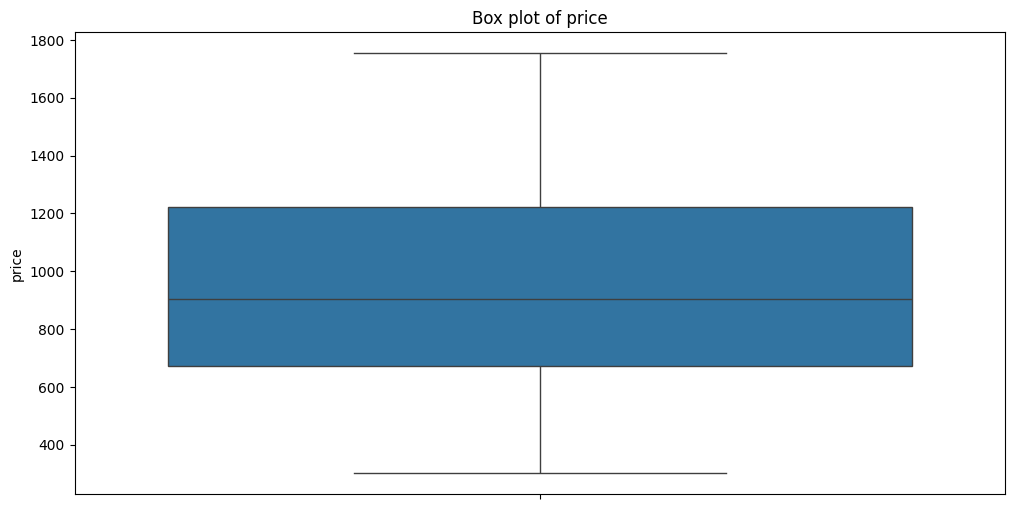

In [89]:
plt.figure(figsize=(12,6))
plt.title("Box plot of price")
ax = sns.boxplot(data=flights_df1['price'])

### 3. Categorical Encoding

In [90]:
# Encode your categorical columns
categorical_data = flights_df1.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = flights_df1.select_dtypes(include=['int64', 'float','int32'])

In [91]:
categorical_data.head()

from                  to  flightType       agency  \
0         Recife (PE)  Florianopolis (SC)  firstClass  FlyingDrops   
1  Florianopolis (SC)         Recife (PE)  firstClass  FlyingDrops   
2       Brasilia (DF)  Florianopolis (SC)  firstClass      CloudFy   
3  Florianopolis (SC)       Brasilia (DF)  firstClass      CloudFy   
4        Aracaju (SE)       Salvador (BH)  firstClass      CloudFy   

                              route   weekday  
0    Recife (PE)-Florianopolis (SC)  Thursday  
1    Florianopolis (SC)-Recife (PE)    Monday  
2  Brasilia (DF)-Florianopolis (SC)  Thursday  
3  Florianopolis (SC)-Brasilia (DF)    Friday  
4        Aracaju (SE)-Salvador (BH)  Thursday

In [92]:
numerical_data.head()

travelCode  userCode    price  distance  total_time  weekday_num  month  \
0           0         0  1434.38    676.53         136            3      9   
1           0         0  1292.29    676.53         136            0      9   
2           1         0  1487.52    637.56         125            3     10   
3           1         0  1127.36    637.56         125            4     10   
4           2         0  1684.05    830.86         136            3     10   

   year       speed  
0  2019  298.469118  
1  2019  298.469118  
2  2019  306.028800  
3  2019  306.028800  
4  2019  366.555882

In [93]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)
categorical_data.head()

from  to  flightType  agency  route  weekday
0     5   3           1       1     43        4
1     3   5           1       1     28        1
2     1   3           1       0     10        4
3     3   1           1       0     25        0
4     0   7           1       0      6        4

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

In [94]:
encode_df= pd.concat([categorical_data,numerical_data], axis=1)

In [95]:
encode_df.head()

from  to  flightType  agency  route  weekday  travelCode  userCode  \
0     5   3           1       1     43        4           0         0   
1     3   5           1       1     28        1           0         0   
2     1   3           1       0     10        4           1         0   
3     3   1           1       0     25        0           1         0   
4     0   7           1       0      6        4           2         0   

     price  distance  total_time  weekday_num  month  year       speed  
0  1434.38    676.53         136            3      9  2019  298.469118  
1  1292.29    676.53         136            0      9  2019  298.469118  
2  1487.52    637.56         125            3     10  2019  306.028800  
3  1127.36    637.56         125            4     10  2019  306.028800  
4  1684.05    830.86         136            3     10  2019  366.555882

In [96]:
encode_df.drop(['weekday'], axis=1, inplace=True)

In [97]:
encode_df.head()

from  to  flightType  agency  route  travelCode  userCode    price  \
0     5   3           1       1     43           0         0  1434.38   
1     3   5           1       1     28           0         0  1292.29   
2     1   3           1       0     10           1         0  1487.52   
3     3   1           1       0     25           1         0  1127.36   
4     0   7           1       0      6           2         0  1684.05   

   distance  total_time  weekday_num  month  year       speed  
0    676.53         136            3      9  2019  298.469118  
1    676.53         136            0      9  2019  298.469118  
2    637.56         125            3     10  2019  306.028800  
3    637.56         125            4     10  2019  306.028800  
4    830.86         136            3     10  2019  366.555882

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [98]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

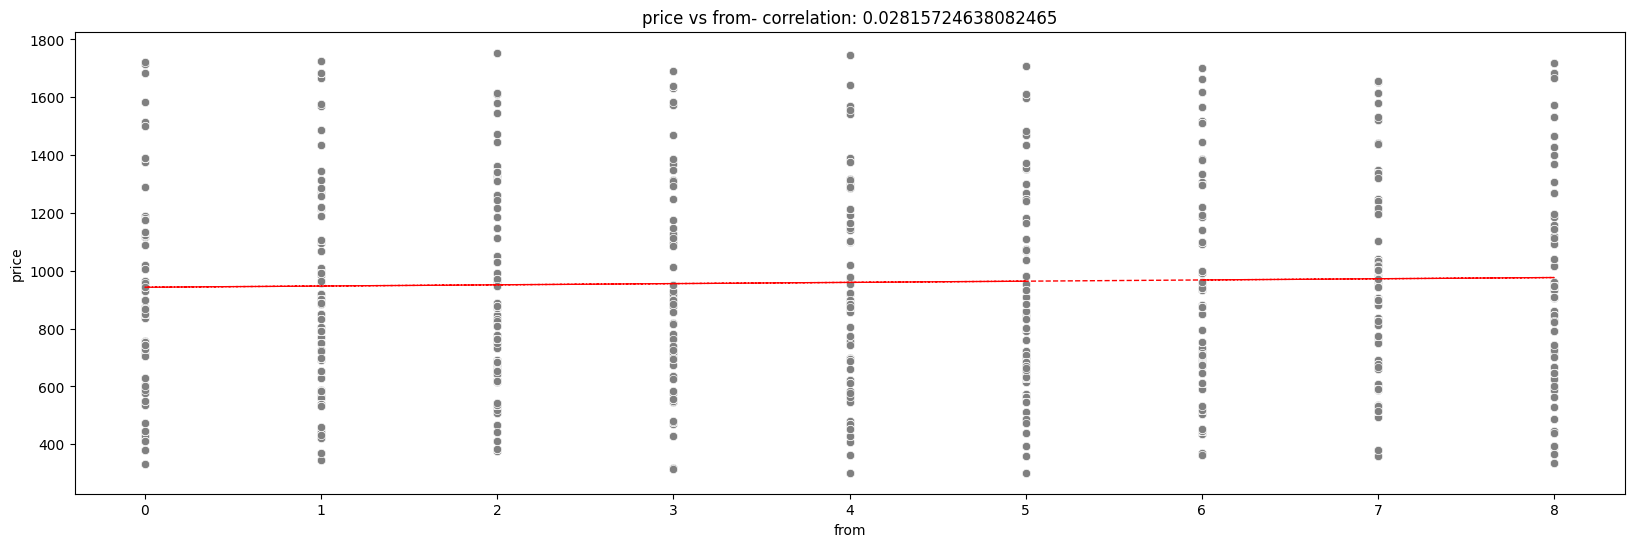

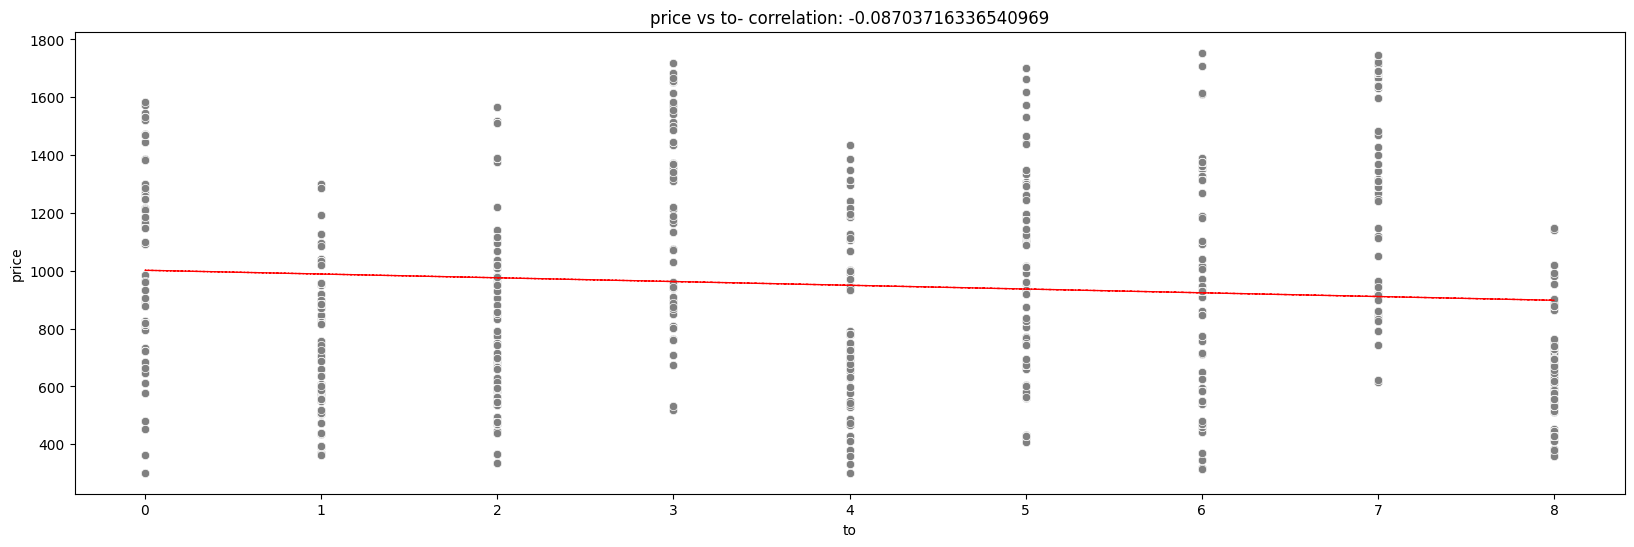

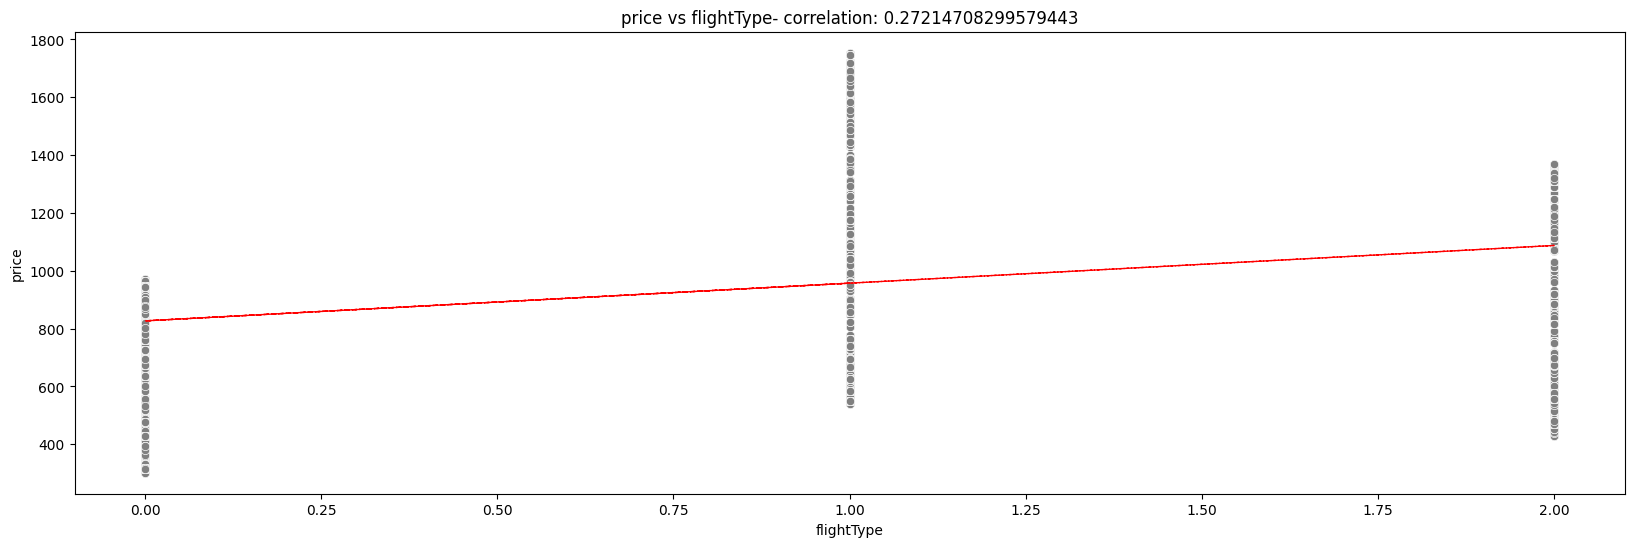

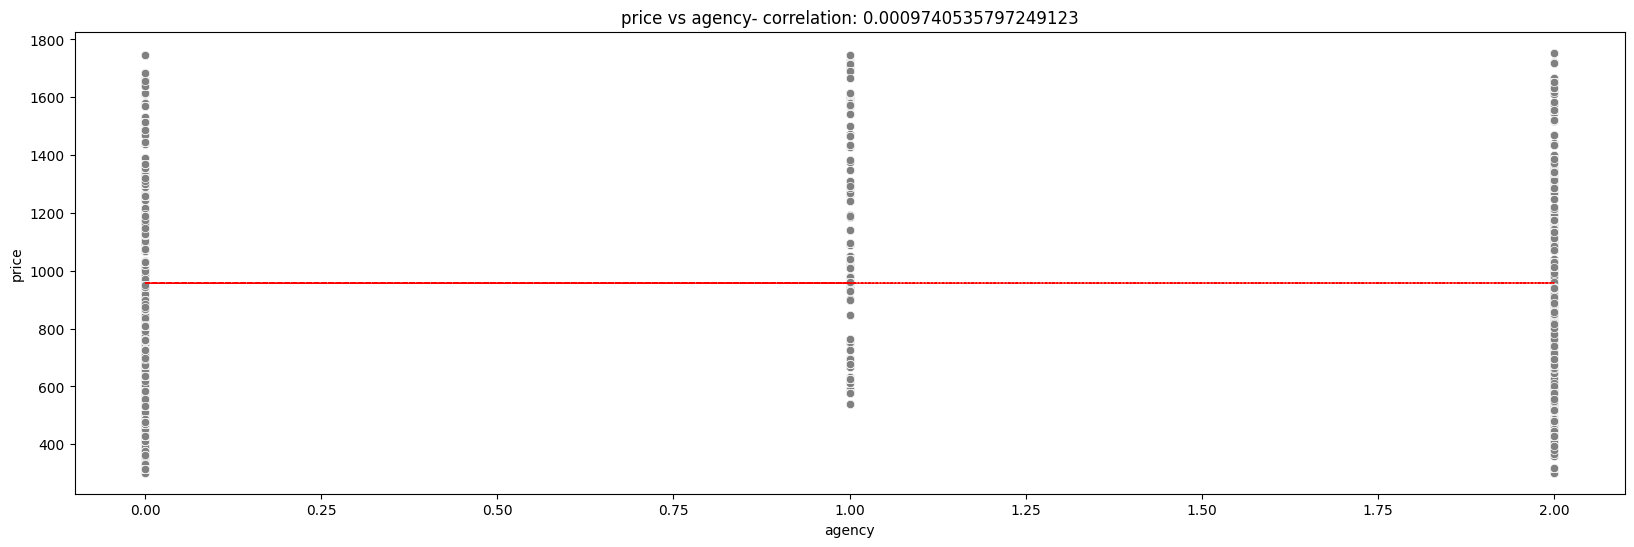

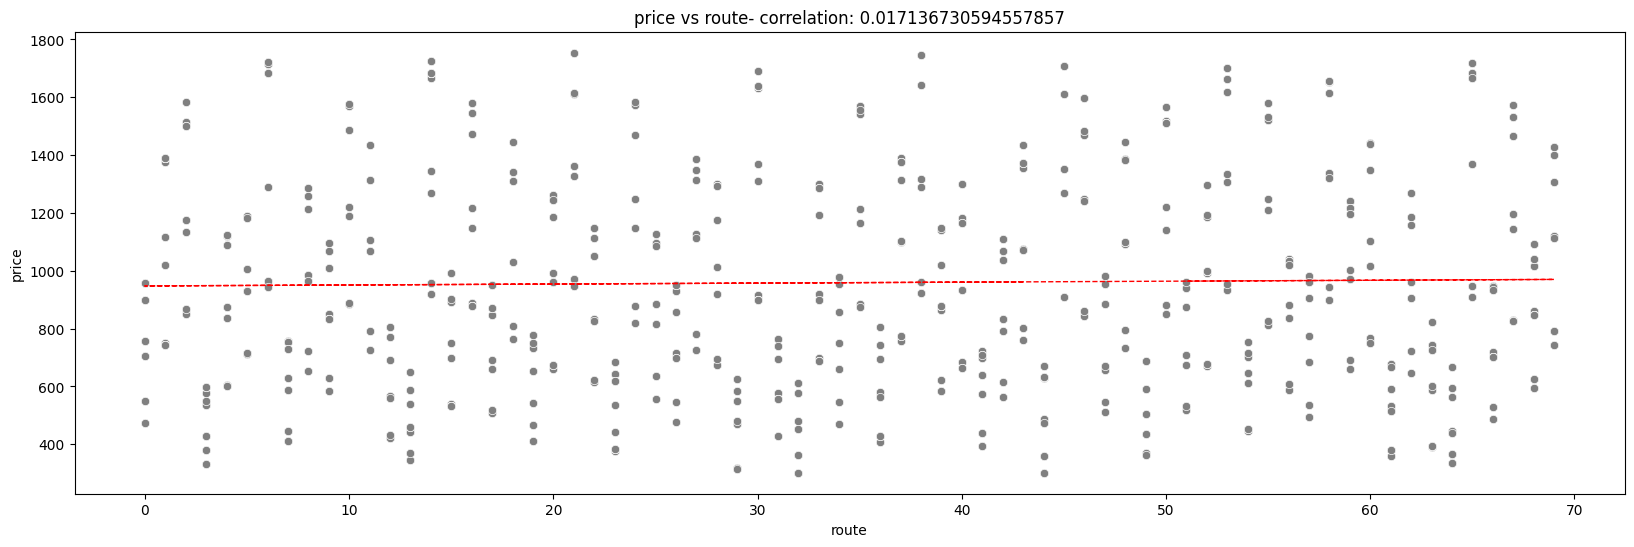

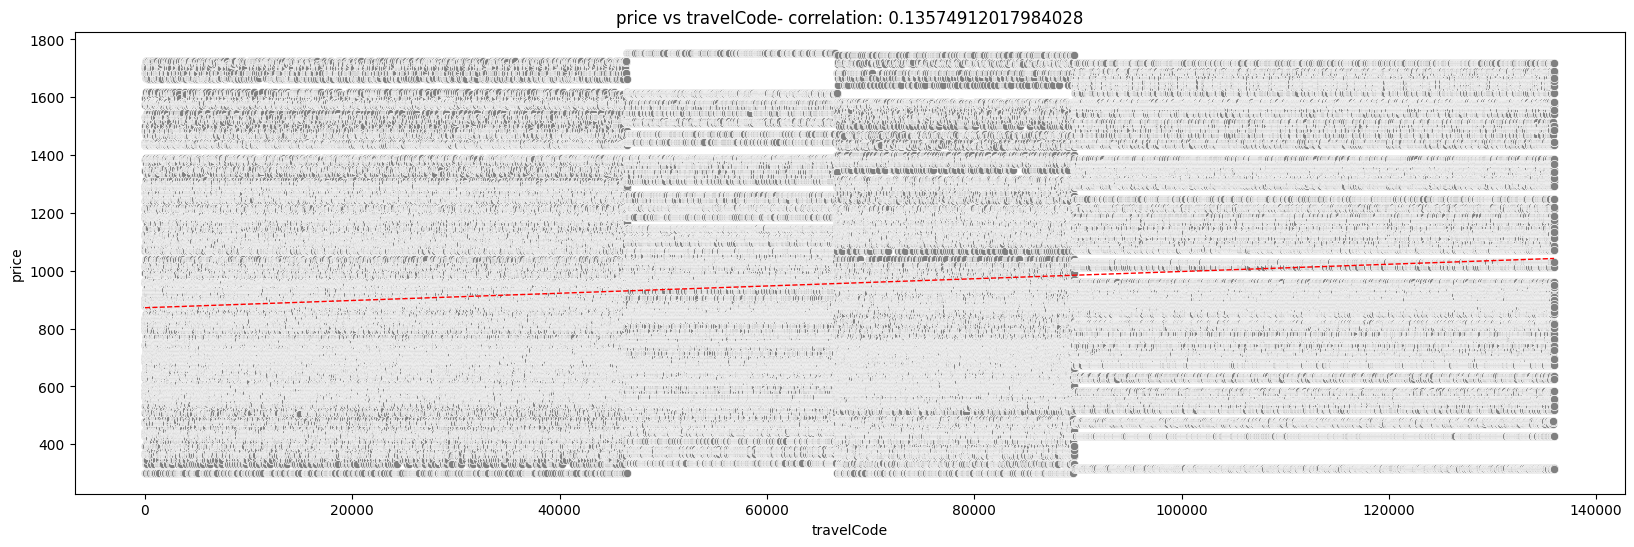

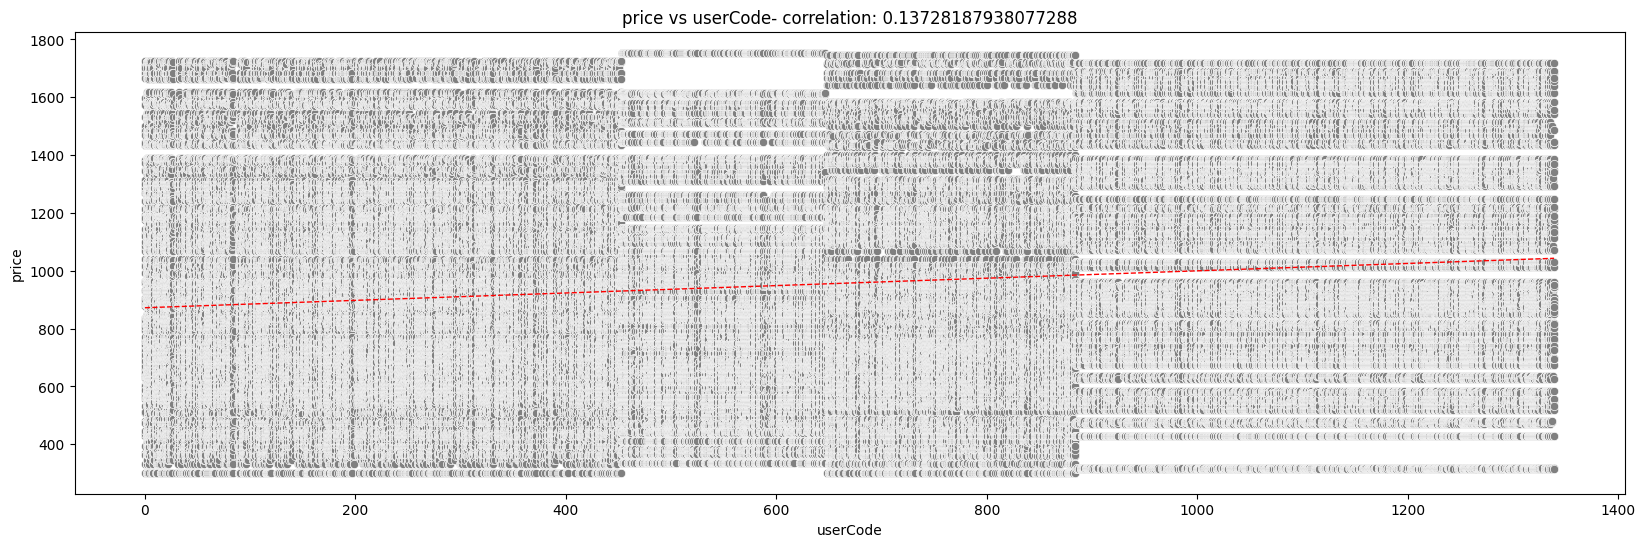

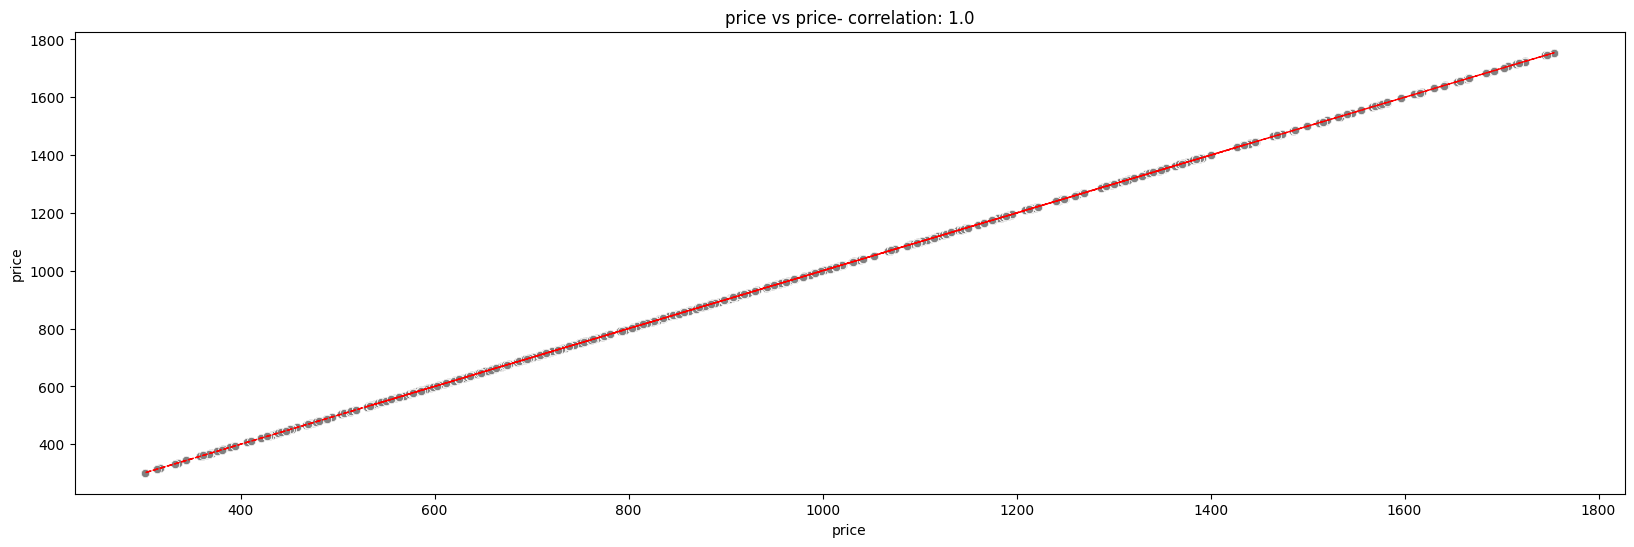

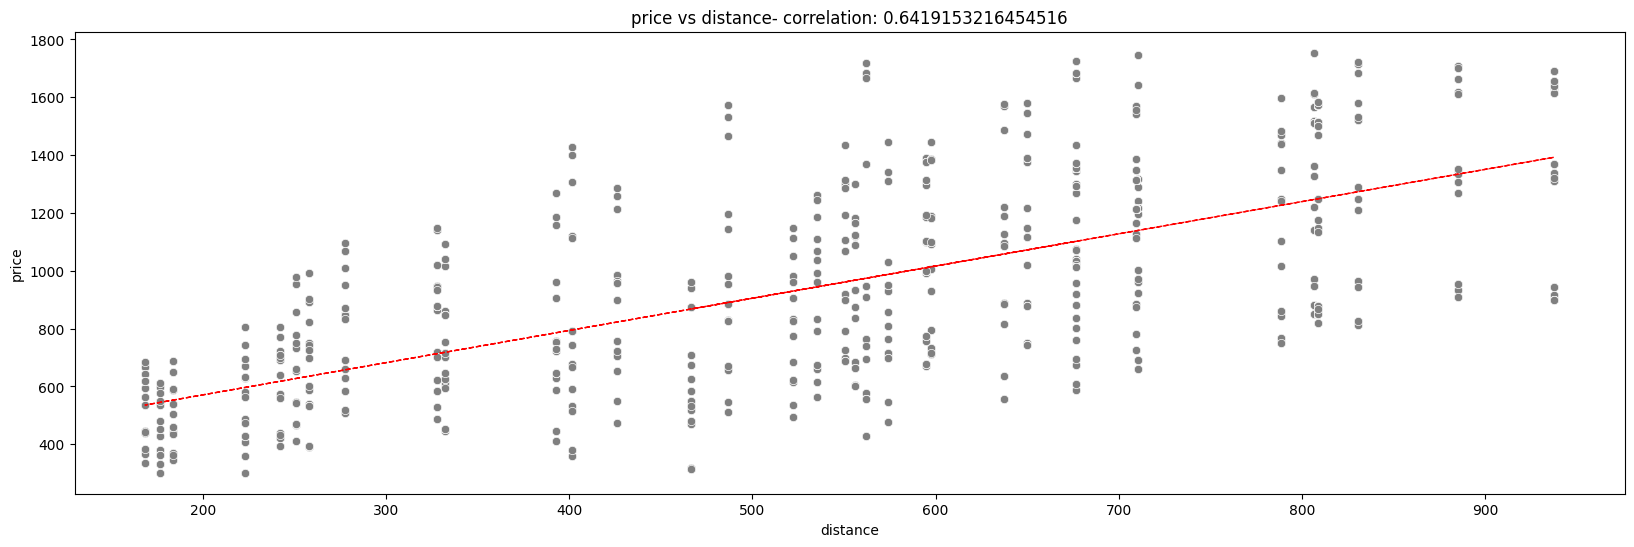

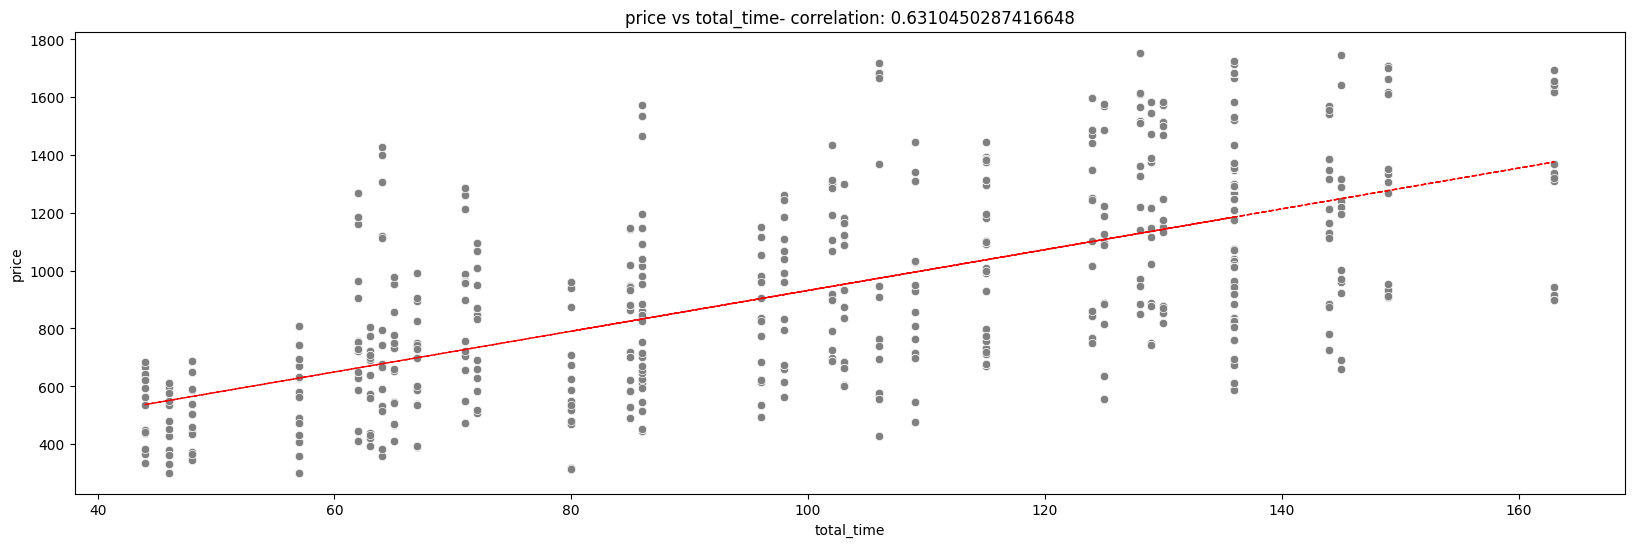

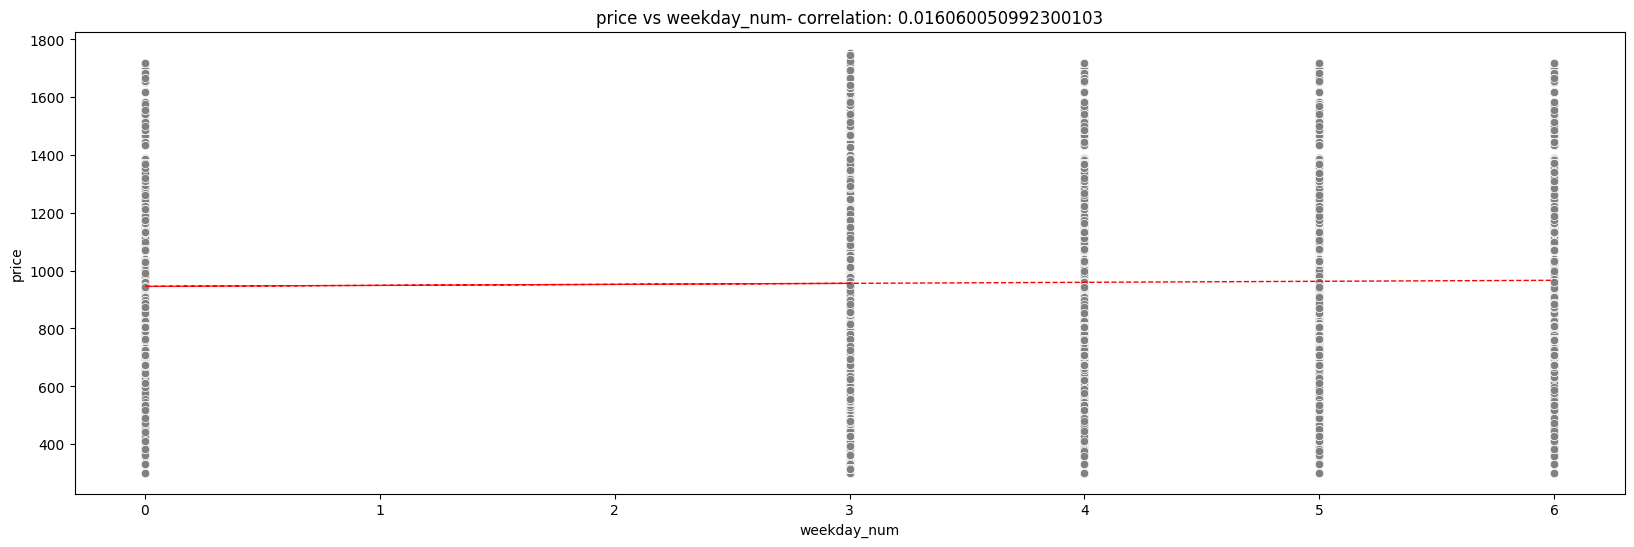

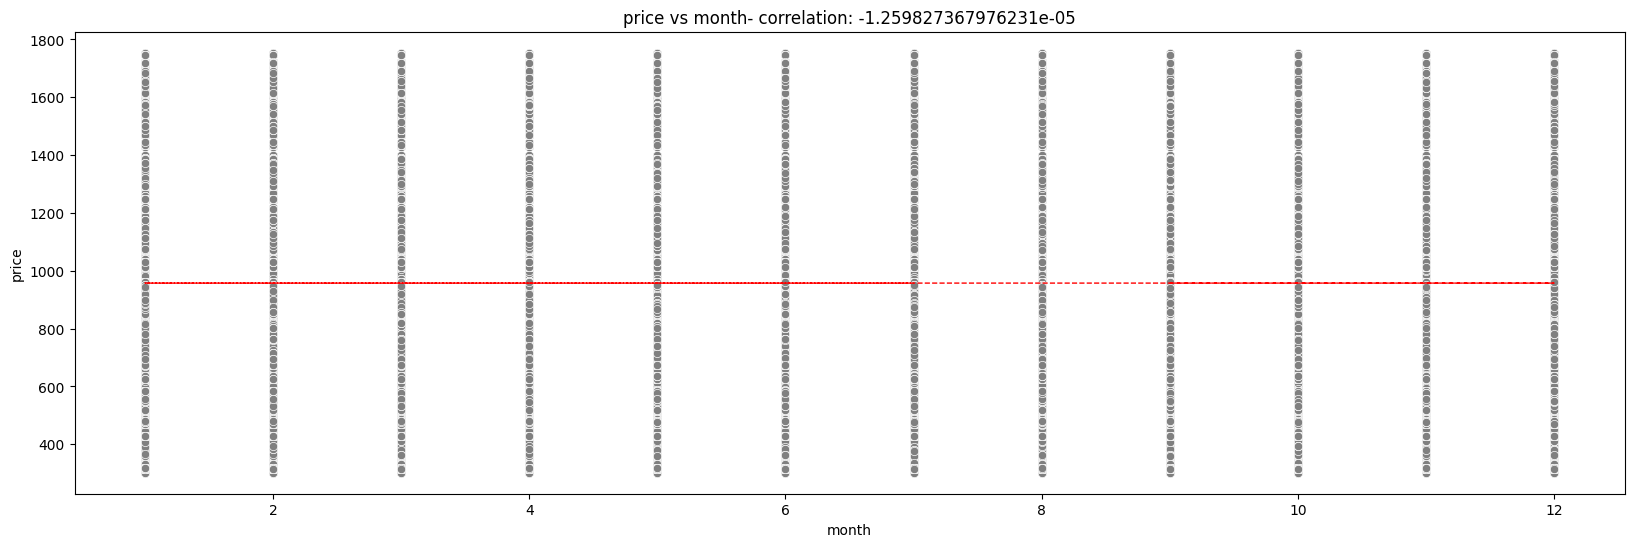

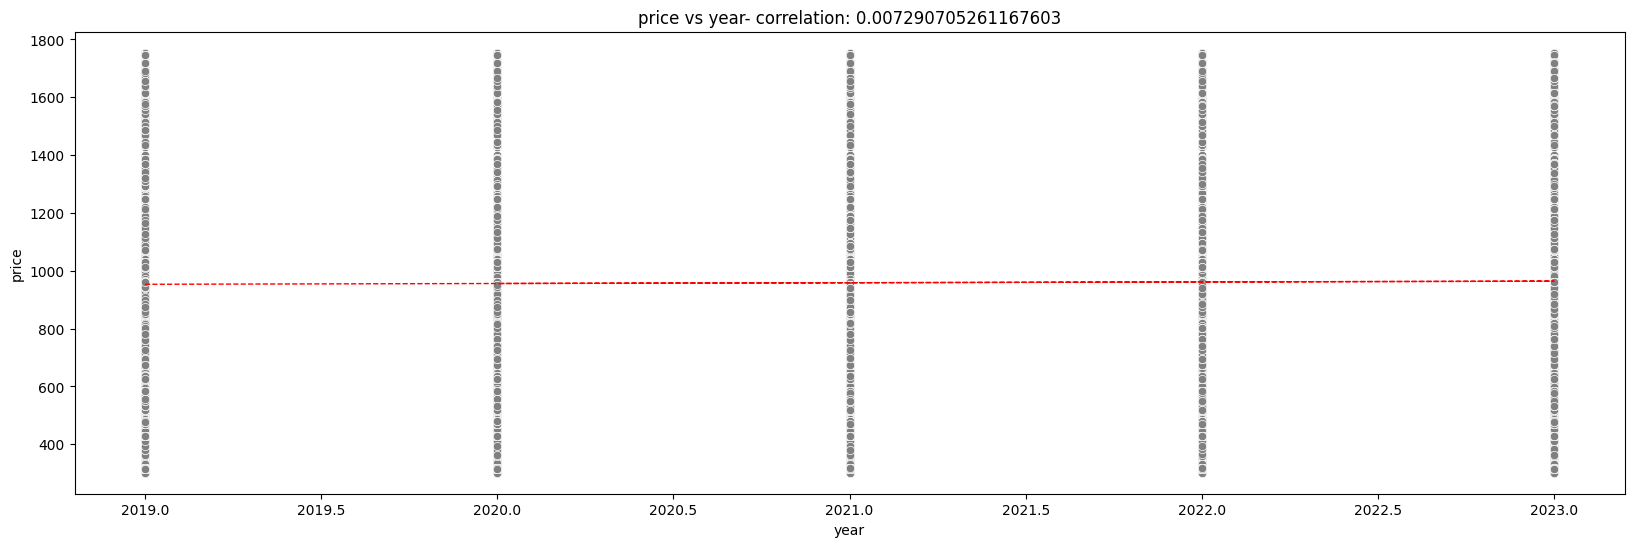

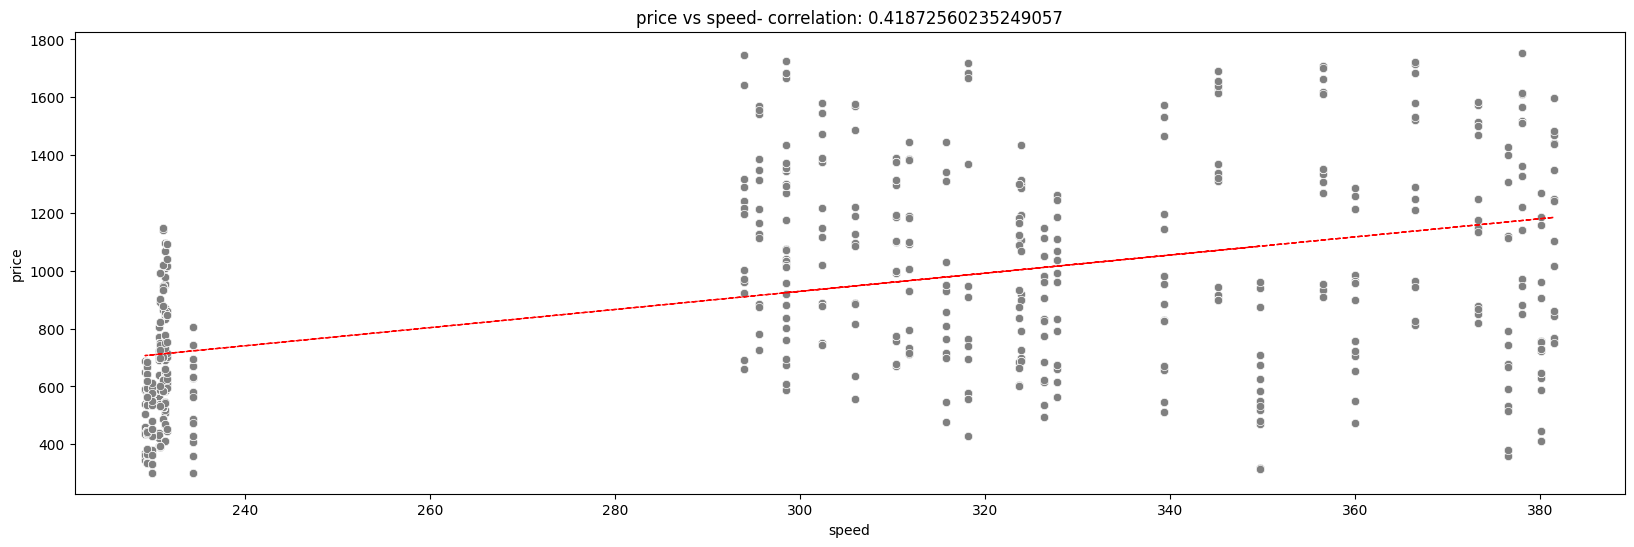

In [99]:
# Select your features wisely to avoid overfitting

for col in encode_df.describe().columns.tolist():
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = encode_df[col]
    label = encode_df['price']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(encode_df[col], encode_df['price'], 1)
    y_hat = np.poly1d(z)(encode_df[col])
    plt.plot(encode_df[col], y_hat, "r--", lw=1)
    plt.show()

In [100]:
encode_df.corr()

from        to  flightType    agency     route  travelCode  \
from         1.000000 -0.177147    0.000664 -0.001697  0.993522    0.085893   
to          -0.177147  1.000000    0.000664 -0.001697 -0.067732    0.085893   
flightType   0.000664  0.000664    1.000000  0.000679  0.000792   -0.000607   
agency      -0.001697 -0.001697    0.000679  1.000000 -0.001886   -0.001368   
route        0.993522 -0.067732    0.000792 -0.001886  1.000000    0.097971   
travelCode   0.085893  0.085893   -0.000607 -0.001368  0.097971    1.000000   
userCode     0.085451  0.085451   -0.000568 -0.001418  0.097511    0.999894   
price        0.028157 -0.087037    0.272147  0.000974  0.017137    0.135749   
distance     0.001387  0.001387    0.004487 -0.000343  0.005063    0.310703   
total_time  -0.000493 -0.000493    0.003769  0.000756  0.003825    0.340019   
weekday_num  0.067275 -0.067543    0.005209 -0.001504  0.060386   -0.000484   
month        0.000632  0.003365   -0.000744  0.002657  0.001047    0.003233   
year        -0.002945 -0.005892    0.001596 -0.000189 -0.003579   -0.000528   
speed       -0.000151 -0.000151    0.003957 -0.002369 -0.000597    0.158926   

             userCode     price  distance  total_time  weekday_num     month  \
from         0.085451  0.028157  0.001387   -0.000493     0.067275  0.000632   
to           0.085451 -0.087037  0.001387   -0.000493    -0.067543  0.003365   
flightType  -0.000568  0.272147  0.004487    0.003769     0.005209 -0.000744   
agency      -0.001418  0.000974 -0.000343    0.000756    -0.001504  0.002657   
route        0.097511  0.017137  0.005063    0.003825     0.060386  0.001047   
travelCode   0.999894  0.135749  0.310703    0.340019    -0.000484  0.003233   
userCode     1.000000  0.137282  0.313996    0.343315    -0.000521  0.003260   
price        0.137282  1.000000  0.641915    0.631045     0.016060 -0.000013   
distance     0.313996  0.641915  1.000000    0.955154    -0.002558  0.000942   
total_time   0.343315  0.631045  0.955154    1.000000    -0.002438  0.001283   
weekday_num -0.000521  0.016060 -0.002558   -0.002438     1.000000 -0.005024   
month        0.003260 -0.000013  0.000942    0.001283    -0.005024  1.000000   
year        -0.001322  0.007291  0.008011    0.008064     0.000952 -0.355074   
speed        0.161047  0.418726  0.709277    0.493377    -0.002153  0.000454   

                 year     speed  
from        -0.002945 -0.000151  
to          -0.005892 -0.000151  
flightType   0.001596  0.003957  
agency      -0.000189 -0.002369  
route       -0.003579 -0.000597  
travelCode  -0.000528  0.158926  
userCode    -0.001322  0.161047  
price        0.007291  0.418726  
distance     0.008011  0.709277  
total_time   0.008064  0.493377  
weekday_num  0.000952 -0.002153  
month       -0.355074  0.000454  
year         1.000000  0.005134  
speed        0.005134  1.000000

<Axes: >

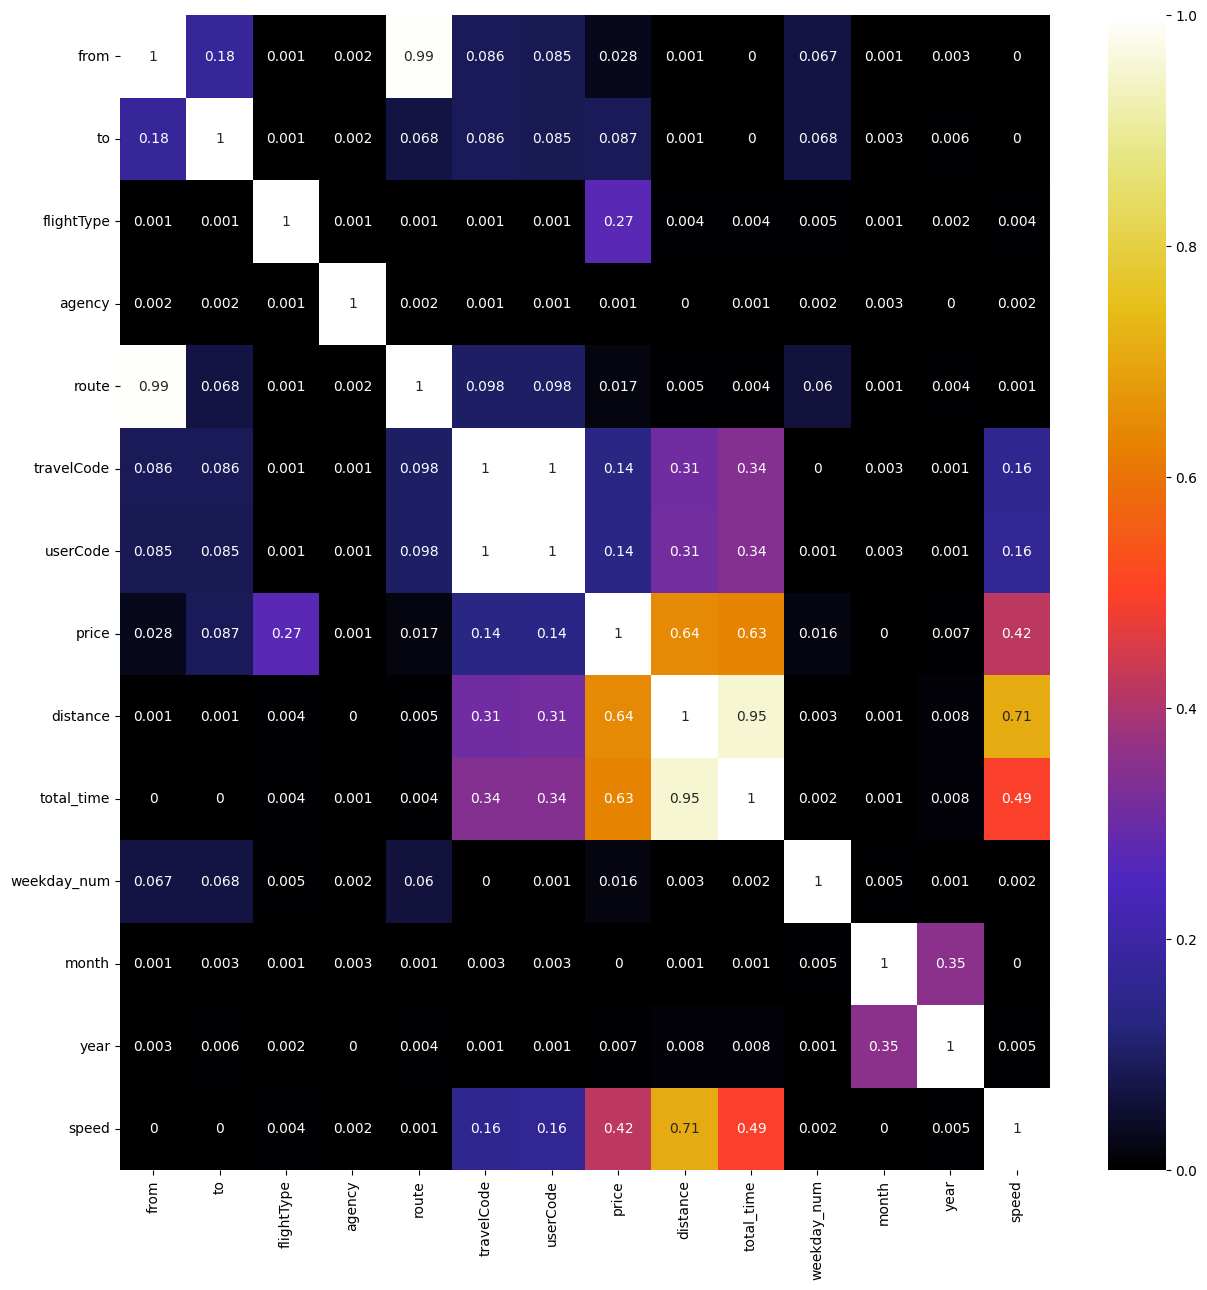

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(round(encode_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

* We have used scatter plot to check how each variable is affecting on target variable.

* Correlation Matrix(Heatmap): A correlation matrix can be used to select features that have high correlations with the target variable and low correlations with other features.

##### Which all features you found important and why?

**Important Features:**

* Distance (distance): Correlation with price is 0.6419. This strong positive correlation indicates that as the distance increases, the price tends to increase.

* Total Time (total_time): Correlation with price is 0.6310. Similar to distance, total time also shows a strong positive correlation with the price.

* Speed (speed): Correlation with price is 0.4187. This moderate positive correlation suggests that speed also has an impact on the price.

These features are likely important for the model because they show a significant correlation with the target variable, price.

**Potentially Less Important Features:**

* Agency (agency): Correlation with price is very low (0.000974). This suggests that the choice of agency does not significantly affect the price in this dataset.

* Route (route): Correlation with price is also low (0.017137). Similar to agency, route does not seem to have a significant impact on the price.

* Month (month): Correlation with price is almost zero (-0.000013), indicating little to no linear relationship with the price.

These features may be less impactful for the model as they show little to no correlation with the target variable.

**Multicollinearity Concerns:**

* TravelCode and UserCode: These features are highly correlated with each other (correlation ~1) and have similar correlations with the target variable.

* Distance and Total Time: High correlation (0.9552) between these features suggests that they might be capturing similar information.

In [119]:
users_df.head()

code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44

In [121]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

In [122]:
con_data=pd.merge(flights_df,users_df,how='left',left_on='userCode',right_on='code')

In [123]:
con_data.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  ... weekday_num  month  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...           3      9   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...           0      9   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...           3     10   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...           4     10   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...           3     10   

   year   weekday       speed code  company       name gender age  
0  2019  Thursday  298.469118    0     4You  Roy Braun   male  21  
1  2019    Monday  298.469118    0     4You  Roy Braun   male  21  
2  2019  Thursday  306.028800    0     4You  Roy Braun   male  21  
3  2019    Friday  306.028800    0     4You  Roy Braun   male  21  
4  2019  Thursday  366.555882    0     4You  Roy Braun   male  21  

[5 rows x 22 columns]

In [124]:
hotels_df.head()

travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019

In [125]:
con_data1=pd.merge(con_data,hotels_df,how='left',left_on='travelCode',right_on='travelCode')

In [127]:
con_data1.head()

travelCode  userCode_x                from                  to  flightType  \
0           0           0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0           0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1           0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1           0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2           0        Aracaju (SE)       Salvador (BH)  firstClass   

   price_x  time  distance       agency     date_x  ...     name_x  gender  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...  Roy Braun    male   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...  Roy Braun    male   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...  Roy Braun    male   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...  Roy Braun    male   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...  Roy Braun    male   

   age  userCode_y   name_y               place  days  price_y    total  \
0   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
1   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
2   21         NaN      NaN                 NaN   NaN      NaN      NaN   
3   21         NaN      NaN                 NaN   NaN      NaN      NaN   
4   21         0.0  Hotel K       Salvador (BH)   2.0   263.41   526.82   

       date_y  
0  09/26/2019  
1  09/26/2019  
2         NaN  
3         NaN  
4  10/10/2019  

[5 rows x 29 columns]

In [128]:
con_data1.columns

Index(['travelCode', 'userCode_x', 'from', 'to', 'flightType', 'price_x',
       'time', 'distance', 'agency', 'date_x', 'route', 'total_time',
       'weekday_num', 'month', 'year', 'weekday', 'speed', 'code', 'company',
       'name_x', 'gender', 'age', 'userCode_y', 'name_y', 'place', 'days',
       'price_y', 'total', 'date_y'],
      dtype='object')

In [129]:
con_data1.drop(['time','date_x','weekday','code','userCode_y','date_y'], axis=1, inplace=True)

In [130]:
con_data1.head()

travelCode  userCode_x                from                  to  flightType  \
0           0           0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0           0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1           0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1           0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2           0        Aracaju (SE)       Salvador (BH)  firstClass   

   price_x  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  ...       speed  company     name_x  gender age   name_y  \
0         136  ...  298.469118     4You  Roy Braun    male  21  Hotel A   
1         136  ...  298.469118     4You  Roy Braun    male  21  Hotel A   
2         125  ...  306.028800     4You  Roy Braun    male  21      NaN   
3         125  ...  306.028800     4You  Roy Braun    male  21      NaN   
4         136  ...  366.555882     4You  Roy Braun    male  21  Hotel K   

                place  days price_y    total  
0  Florianopolis (SC)   4.0  313.02  1252.08  
1  Florianopolis (SC)   4.0  313.02  1252.08  
2                 NaN   NaN     NaN      NaN  
3                 NaN   NaN     NaN      NaN  
4       Salvador (BH)   2.0  263.41   526.82  

[5 rows x 23 columns]

In [131]:
con_categorical_data =con_data1.select_dtypes(exclude=['int64', 'float','int32'])
con_numerical_data = con_data1.select_dtypes(include=['int64', 'float','int32'])

In [132]:
le = LabelEncoder()
con_categorical_data = con_categorical_data.apply(LabelEncoder().fit_transform)
con_categorical_data.head()

from  to  flightType  agency  route  company  name_x  gender  name_y  place
0     5   3           1       1     43        0    1116       1       0      3
1     3   5           1       1     28        0    1116       1       0      3
2     1   3           1       0     10        0    1116       1       9      9
3     3   1           1       0     25        0    1116       1       9      9
4     0   7           1       0      6        0    1116       1       7      7

In [133]:
con_encode_df= pd.concat([con_categorical_data,con_numerical_data], axis=1)

In [135]:
con_encode_df.head()

from  to  flightType  agency  route  company  name_x  gender  name_y  \
0     5   3           1       1     43        0    1116       1       0   
1     3   5           1       1     28        0    1116       1       0   
2     1   3           1       0     10        0    1116       1       9   
3     3   1           1       0     25        0    1116       1       9   
4     0   7           1       0      6        0    1116       1       7   

   place  ...  distance  total_time  weekday_num  month  year       speed  \
0      3  ...    676.53         136            3      9  2019  298.469118   
1      3  ...    676.53         136            0      9  2019  298.469118   
2      9  ...    637.56         125            3     10  2019  306.028800   
3      9  ...    637.56         125            4     10  2019  306.028800   
4      7  ...    830.86         136            3     10  2019  366.555882   

   age  days  price_y    total  
0   21   4.0   313.02  1252.08  
1   21   4.0   313.02  1252.08  
2   21   NaN      NaN      NaN  
3   21   NaN      NaN      NaN  
4   21   2.0   263.41   526.82  

[5 rows x 23 columns]

In [136]:
con_encode_df.corr()

from        to  flightType    agency     route   company  \
from         1.000000 -0.177147    0.000664 -0.001697  0.993522  0.110116   
to          -0.177147  1.000000    0.000664 -0.001697 -0.067732  0.110116   
flightType   0.000664  0.000664    1.000000  0.000679  0.000792 -0.001954   
agency      -0.001697 -0.001697    0.000679  1.000000 -0.001886  0.001775   
route        0.993522 -0.067732    0.000792 -0.001886  1.000000  0.121818   
company      0.110116  0.110116   -0.001954  0.001775  0.121818  1.000000   
name_x      -0.001543 -0.001543   -0.000443 -0.005047 -0.001658 -0.019207   
gender      -0.008956 -0.008956   -0.005878 -0.001153 -0.009978 -0.041654   
name_y      -0.026907 -0.026907    0.001494  0.001122 -0.029931  0.011203   
place        0.146702  0.146702    0.001576  0.000028  0.164892 -0.003180   
travelCode   0.085893  0.085893   -0.000607 -0.001368  0.097971  0.619987   
userCode_x   0.085451  0.085451   -0.000568 -0.001418  0.097511  0.613097   
price_x      0.028157 -0.087037    0.272147  0.000974  0.017137 -0.013873   
distance     0.001387  0.001387    0.004487 -0.000343  0.005063 -0.019173   
total_time  -0.000493 -0.000493    0.003769  0.000756  0.003825  0.000841   
weekday_num  0.067275 -0.067543    0.005209 -0.001504  0.060386  0.000654   
month        0.000632  0.003365   -0.000744  0.002657  0.001047  0.003729   
year        -0.002945 -0.005892    0.001596 -0.000189 -0.003579 -0.014789   
speed       -0.000151 -0.000151    0.003957 -0.002369 -0.000597 -0.035070   
age         -0.007474 -0.007474    0.001963 -0.002935 -0.008615 -0.001437   
days         0.001180  0.001180   -0.003287 -0.002331  0.001281 -0.005963   
price_y     -0.015797 -0.015797   -0.004767  0.006264 -0.014562  0.028272   
total       -0.007852 -0.007852   -0.004828  0.001924 -0.006929  0.013574   

               name_x    gender    name_y     place  ...  distance  \
from        -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387   
to          -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387   
flightType  -0.000443 -0.005878  0.001494  0.001576  ...  0.004487   
agency      -0.005047 -0.001153  0.001122  0.000028  ... -0.000343   
route       -0.001658 -0.009978 -0.029931  0.164892  ...  0.005063   
company     -0.019207 -0.041654  0.011203 -0.003180  ... -0.019173   
name_x       1.000000 -0.073796 -0.003008 -0.001348  ...  0.015493   
gender      -0.073796  1.000000 -0.001104 -0.001005  ... -0.006927   
name_y      -0.003008 -0.001104  1.000000  0.647496  ...  0.070716   
place       -0.001348 -0.001005  0.647496  1.000000  ...  0.005179   
travelCode   0.005691 -0.025629  0.027724 -0.005482  ...  0.310703   
userCode_x   0.006618 -0.025657  0.027840 -0.005488  ...  0.313996   
price_x      0.007544 -0.002276  0.040995 -0.009051  ...  0.641915   
distance     0.015493 -0.006927  0.070716  0.005179  ...  1.000000   
total_time   0.016973 -0.007747  0.046165 -0.002692  ...  0.955154   
weekday_num  0.001698  0.000172  0.001050 -0.000192  ... -0.002558   
month       -0.000682 -0.001278 -0.001550  0.000382  ...  0.000942   
year         0.021280  0.001642  0.001979 -0.002717  ...  0.008011   
speed        0.007323 -0.005594  0.081135  0.015932  ...  0.709277   
age          0.044291 -0.022434 -0.001588 -0.000795  ... -0.025818   
days        -0.002757 -0.004475 -0.001537  0.007193  ... -0.001956   
price_y      0.003332  0.007800 -0.223930 -0.010092  ...  0.223009   
total       -0.001695  0.000279 -0.134509 -0.000219  ...  0.132348   

             total_time  weekday_num     month      year     speed       age  \
from          -0.000493     0.067275  0.000632 -0.002945 -0.000151 -0.007474   
to            -0.000493    -0.067543  0.003365 -0.005892 -0.000151 -0.007474   
flightType     0.003769     0.005209 -0.000744  0.001596  0.003957  0.001963   
agency         0.000756    -0.001504  0.002657 -0.000189 -0.002369 -0.002935   
route          0.003825     0.060386  0.001047 -0.003579 -0.000597 -0.008615   
company

<Axes: >

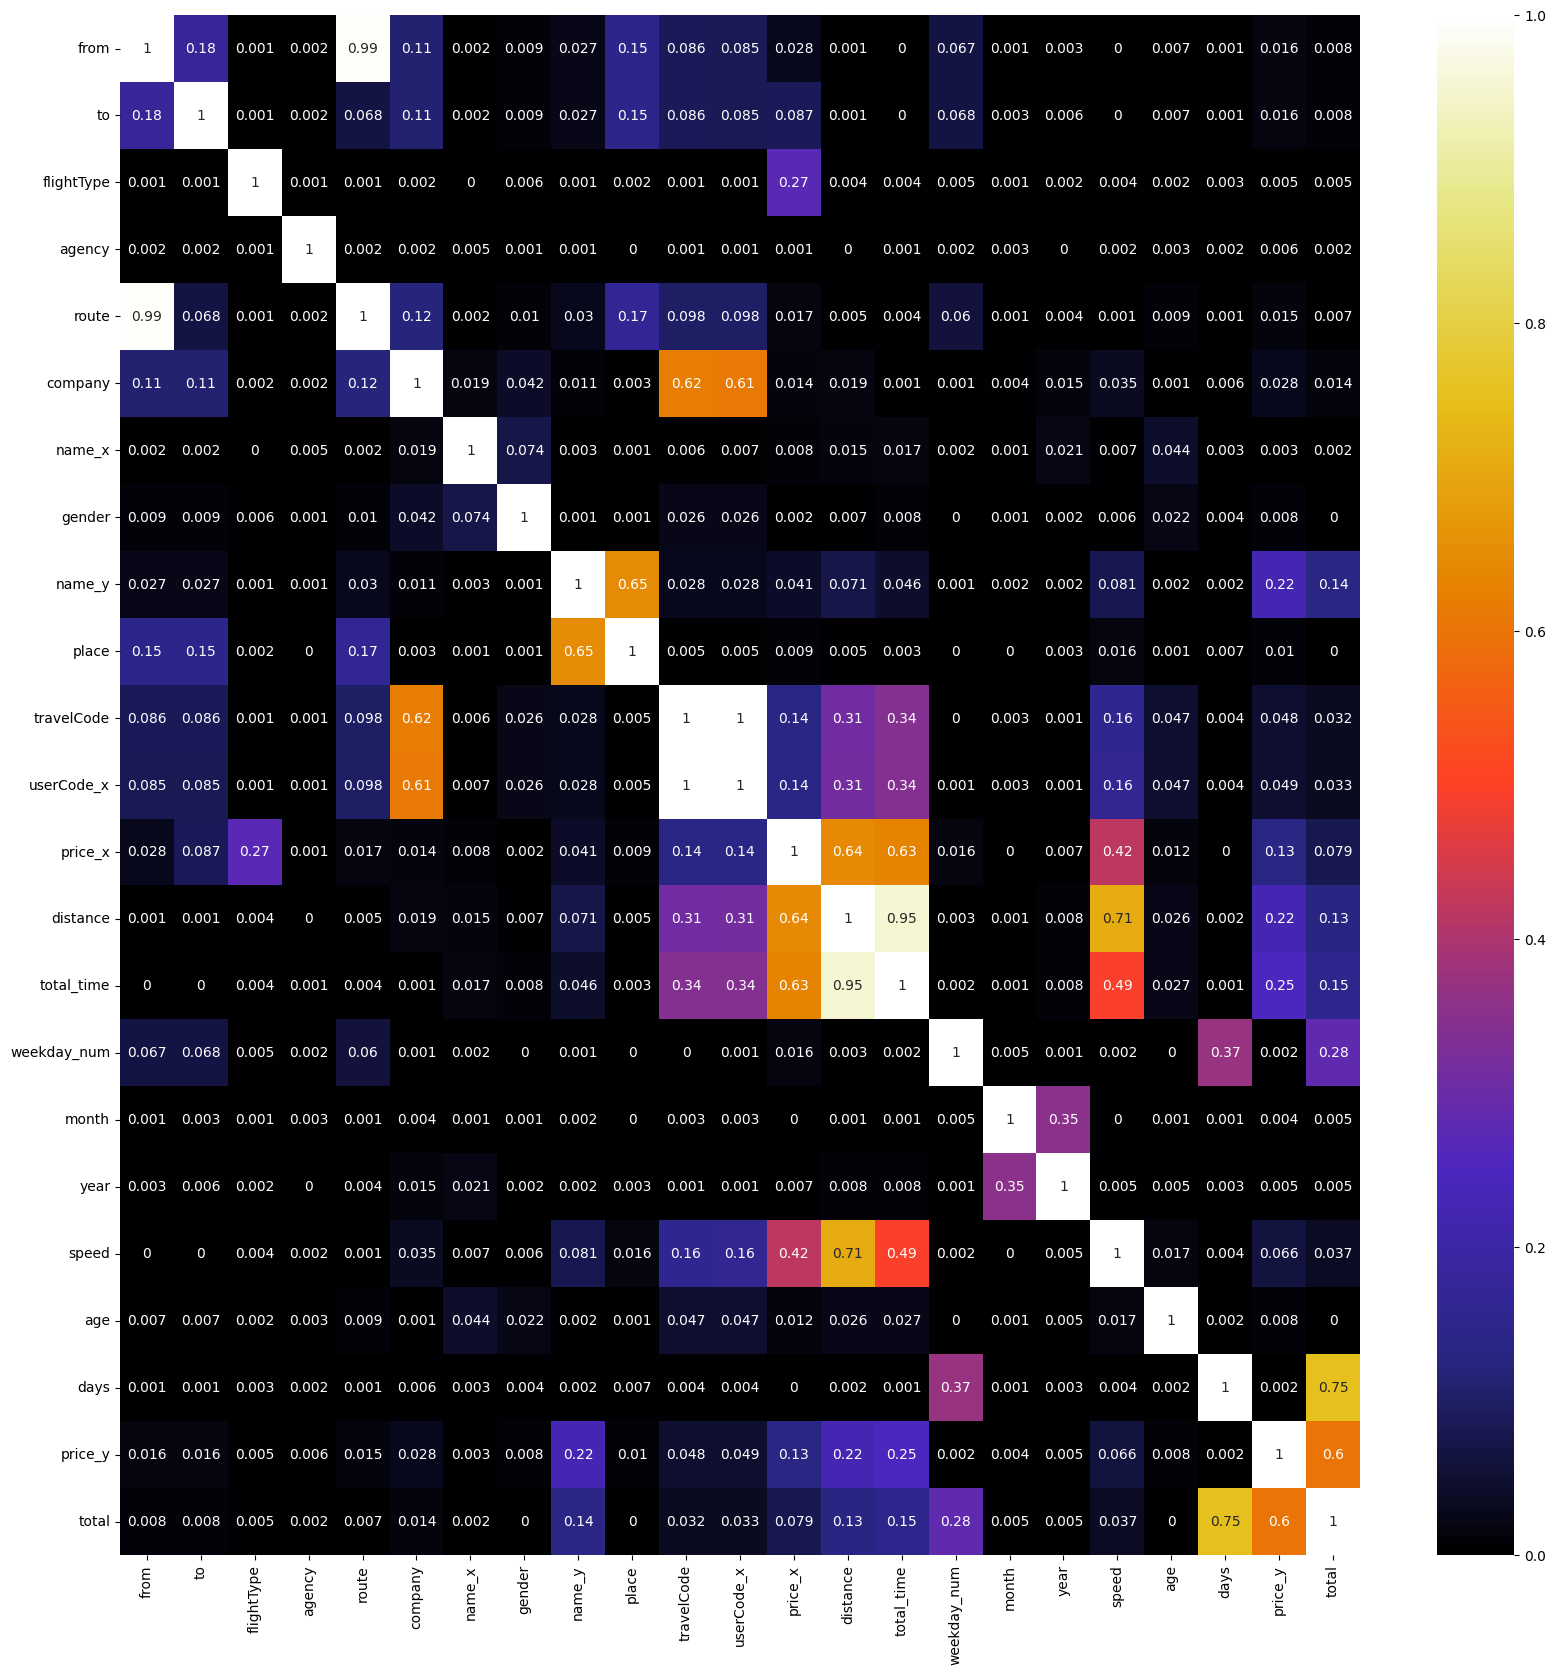

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(con_encode_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [141]:
encode_df.head()

from  to  flightType  agency  route  travelCode  userCode    price  \
0     5   3           1       1     43           0         0  1434.38   
1     3   5           1       1     28           0         0  1292.29   
2     1   3           1       0     10           1         0  1487.52   
3     3   1           1       0     25           1         0  1127.36   
4     0   7           1       0      6           2         0  1684.05   

   distance  total_time  weekday_num  month  year       speed  
0    676.53         136            3      9  2019  298.469118  
1    676.53         136            0      9  2019  298.469118  
2    637.56         125            3     10  2019  306.028800  
3    637.56         125            4     10  2019  306.028800  
4    830.86         136            3     10  2019  366.555882

In [159]:
final_df=encode_df[['to','flightType','route','userCode','weekday_num','year','speed','price']]

In [160]:
final_df.head()

to  flightType  route  userCode  weekday_num  year       speed    price
0   3           1     43         0            3  2019  298.469118  1434.38
1   5           1     28         0            0  2019  298.469118  1292.29
2   3           1     10         0            3  2019  306.028800  1487.52
3   1           1     25         0            4  2019  306.028800  1127.36
4   7           1      6         0            3  2019  366.555882  1684.05

<Axes: >

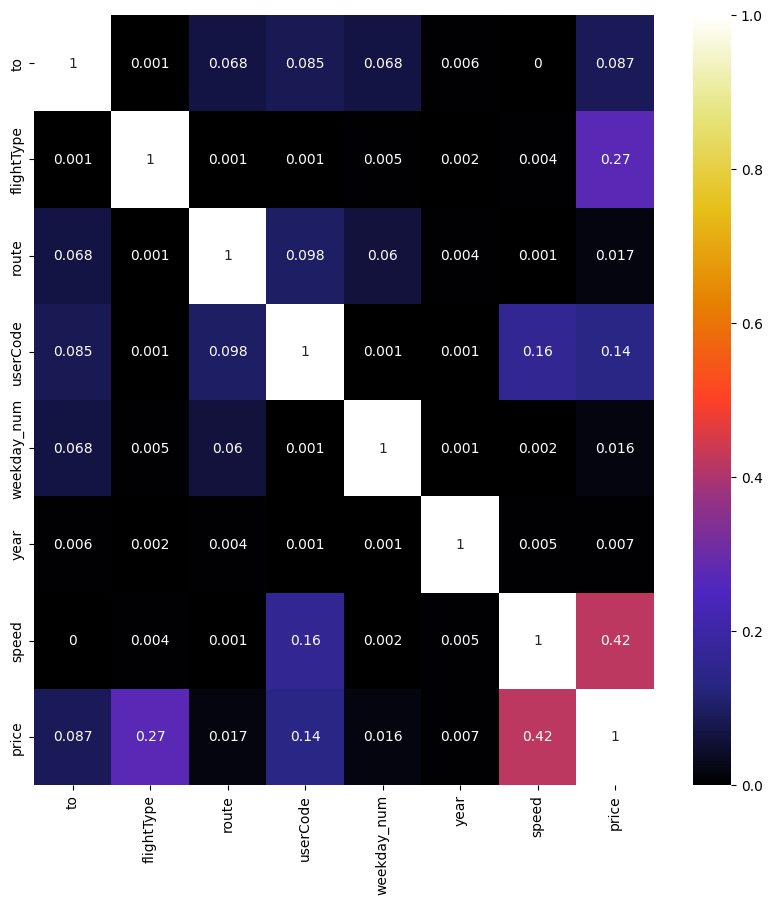

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

### 5. Data Transformation

Before Applying Transformation


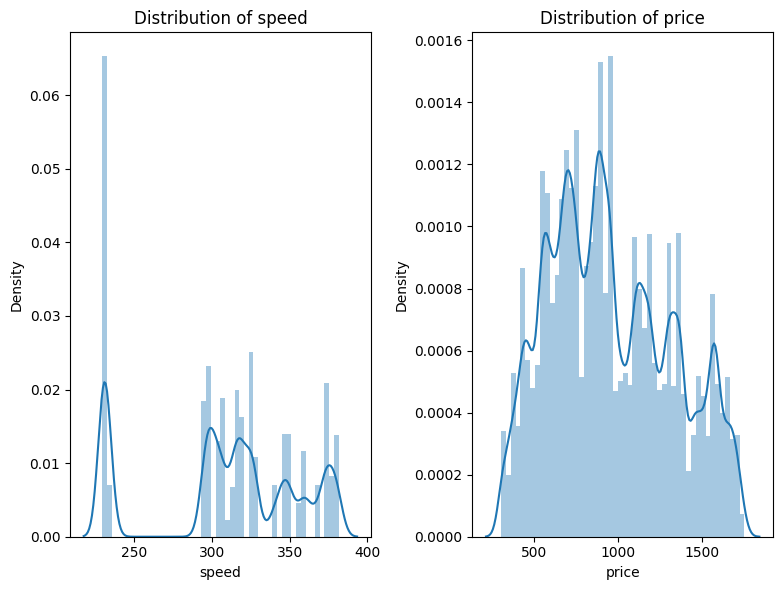

In [163]:
cont_variables= ["speed","price"]
plt.figure(figsize=(20,6))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [164]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

After Applying Transformation


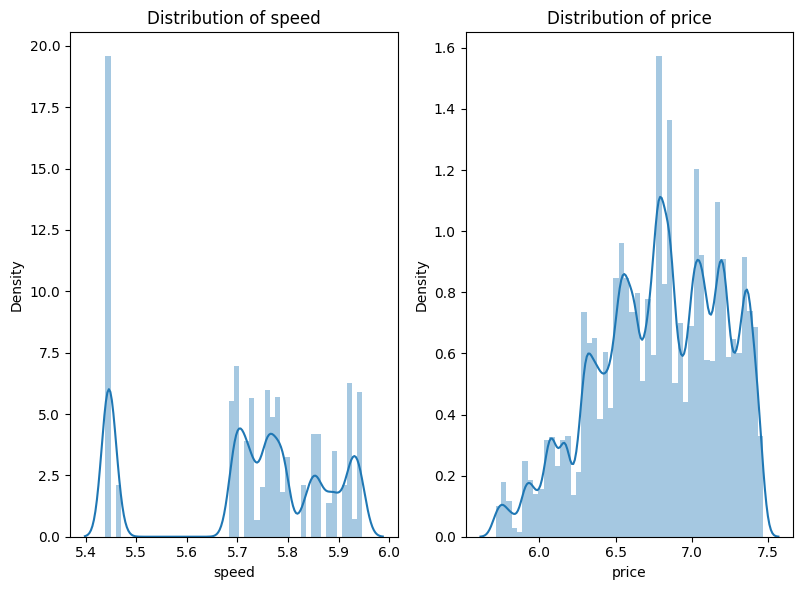

In [166]:
test_df1['speed']=np.log(test_df1['speed']+1)
test_df1['price']=np.log(test_df1['price']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()


After Applying Transformation


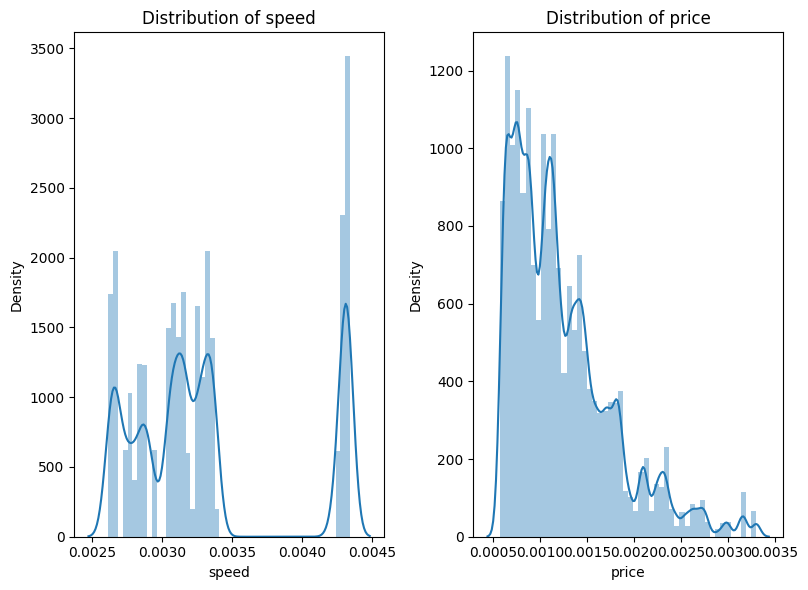

In [167]:
# Applying transformation on the above considered columns
test_df2['speed']=1/(test_df2['speed']+1)
test_df2['price']=1/(test_df2['price']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()


After Applying Transformation


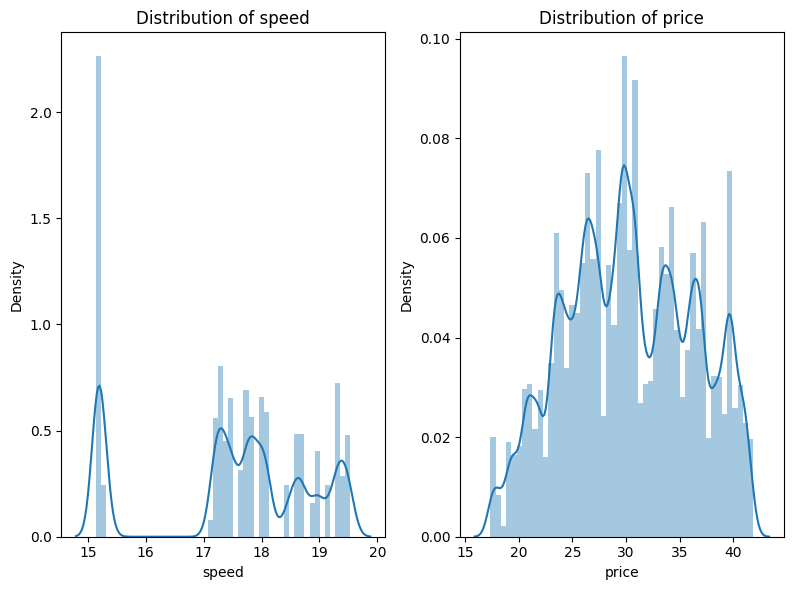

In [168]:
 #Applying transformation on the above considered columns
test_df3['speed']=(test_df3['speed'])**(1/2)
test_df3['price']=(test_df3['price'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

After Applying Transformation


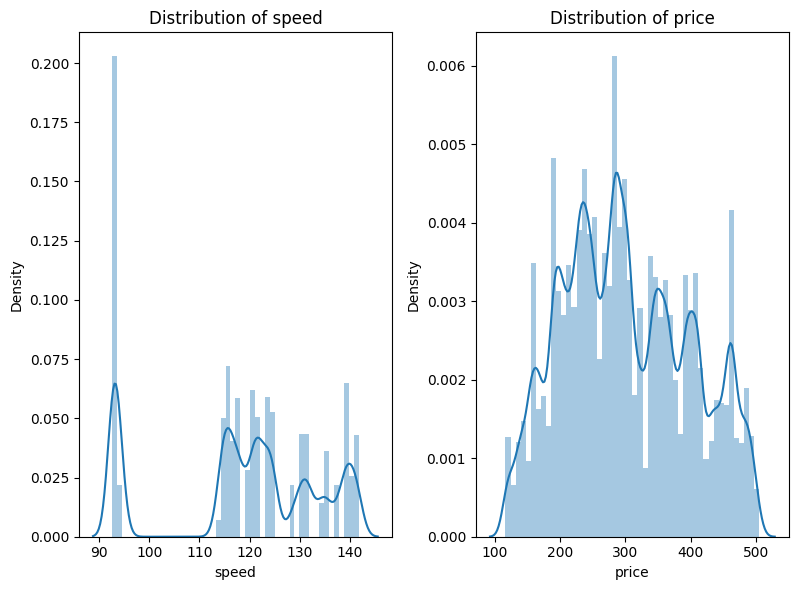

In [169]:

# Applying transformation on the above considered columns
test_df4['speed']=(test_df4['speed'])**(1/1.2)
test_df4['price']=(test_df4['price'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()


In [102]:
# Transform Your data

### 6. Data Scaling

In [171]:
# Scaling your data
# Separating "x" and "y" variables
x= final_df.drop('price',axis=1)
y= final_df[['price']]
print(x.shape)
print(y.shape)


(271888, 7)
(271888, 1)


In [172]:
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [104]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [173]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(217510, 7)
(54378, 7)
(217510, 1)
(54378, 1)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [106]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [174]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

   ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [175]:
# Defining the function that plots Evaluation Metric Score Chart
def EvaluationMetricChart(yt,yp):
   ''' Prints Evaluation Metrics Chart'''
   #Plotting Actual and Predicted Values
   plt.figure(figsize=(18,6))
   plt.plot((yp)[:100])
   plt.plot((np.array(yt)[:100]))
   plt.legend(["Predicted","Actual"])
   plt.title('Actual and Predicted Time Duration')

### ML Model - 1

In [176]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)
# Predict on the model
y_pred_lr_train = linear_regressor.predict(x_train)
y_pred_lr_test  = linear_regressor.predict(x_test)

In [177]:
linear_regressor.coef_

array([[-33.20564588,  98.16168372,   0.86704901,  29.36317682,
          3.473492  ,   1.74758052, 146.28167986]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [178]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lr_train,y_test,y_pred_lr_test)

--------------------------------------------------
MAE on train is: 248.67355379361499
MAE on test is: 250.1371435493295
--------------------------------------------------
MSE on train is: 96638.18298667608
MSE on test is: 97548.73691579002
--------------------------------------------------
RMSE on train is: 310.86682516260254
RMSE on test is: 312.32793169326055
--------------------------------------------------
MAPE on train is: 30.23442240982967  %
MAPE on test is: 30.405450964491155  %
--------------------------------------------------
R2 on train is: 0.2624835992818465
R2 on test is: 0.2622143083757007
--------------------------------------------------
Accuracy of train is: 69.76557759017032  %
Accuracy of test is: 69.59454903550885  %
--------------------------------------------------


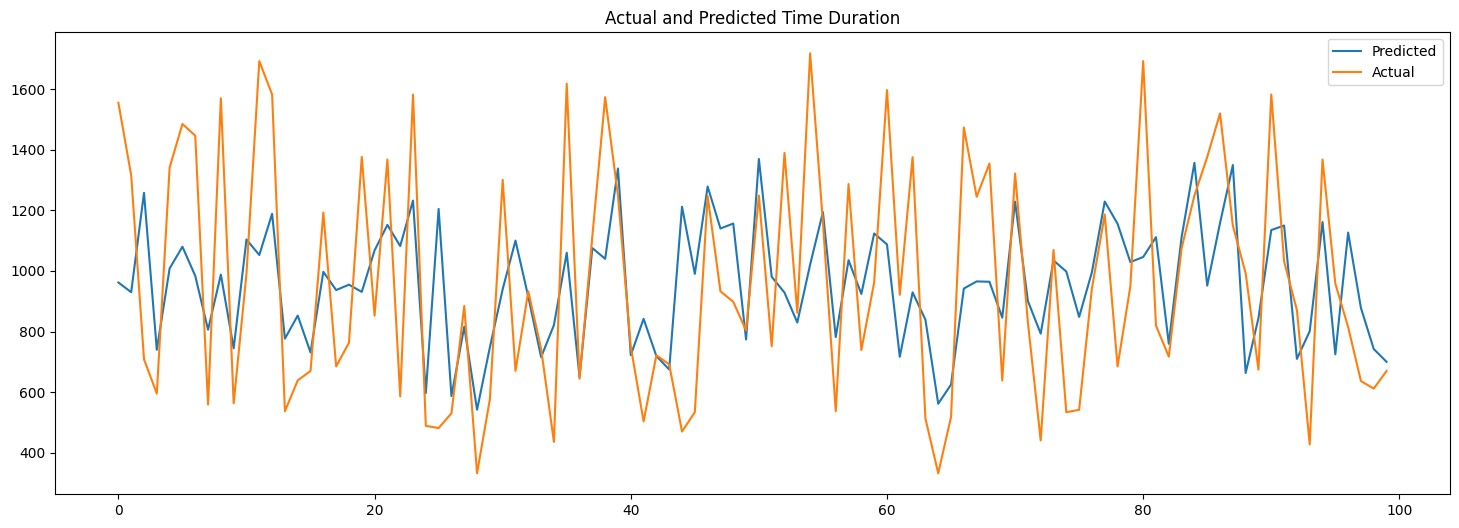

In [179]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lr_train)

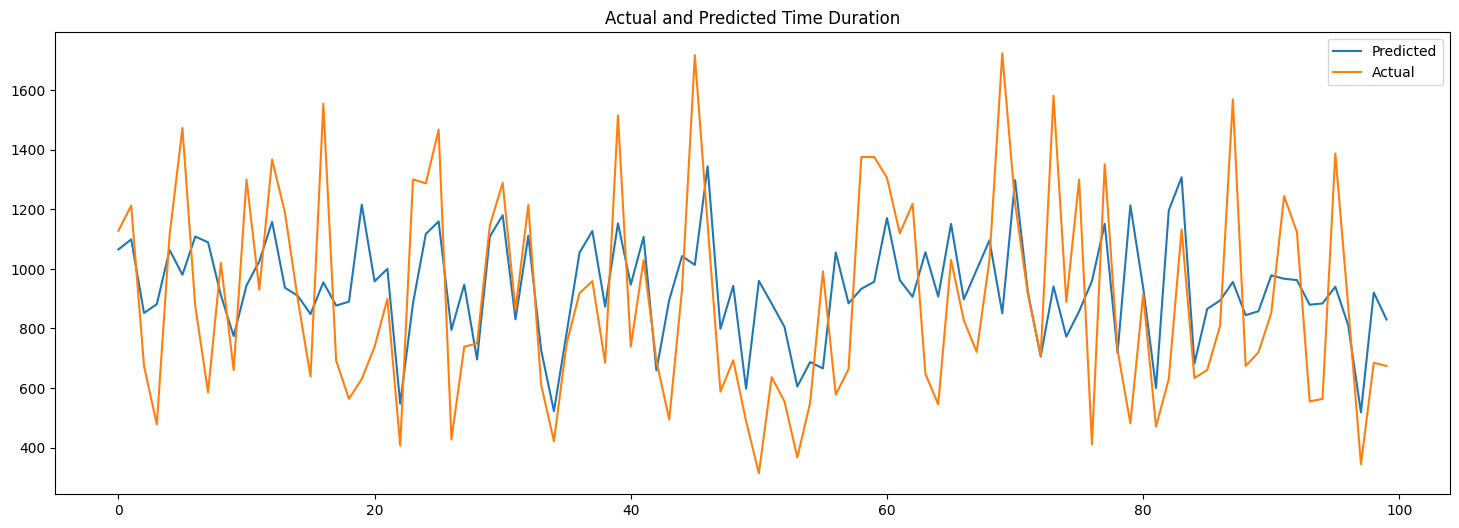

In [180]:
EvaluationMetricChart(y_test,y_pred_lr_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [181]:
lasso= Lasso()
# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}
# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)
# Predict the output
y_pred_lasso_train = lassoR.predict(x_train)
y_pred_lasso_test  = lassoR.predict(x_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 7}
Negative mean square error is: -96644.53426597061


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [182]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lasso_train,y_test,y_pred_lasso_test)

--------------------------------------------------
MAE on train is: 248.67363205132483
MAE on test is: 250.13722532470686
--------------------------------------------------
MSE on train is: 96638.18299296156
MSE on test is: 97548.73783286332
--------------------------------------------------
RMSE on train is: 310.86682517271214
RMSE on test is: 312.32793316138617
--------------------------------------------------
MAPE on train is: 30.23445367453076  %
MAPE on test is: 30.405482356520963  %
--------------------------------------------------
R2 on train is: 0.26248359923387754
R2 on test is: 0.2622143014396442
--------------------------------------------------
Accuracy of train is: 69.76554632546924  %
Accuracy of test is: 69.59451764347904  %
--------------------------------------------------


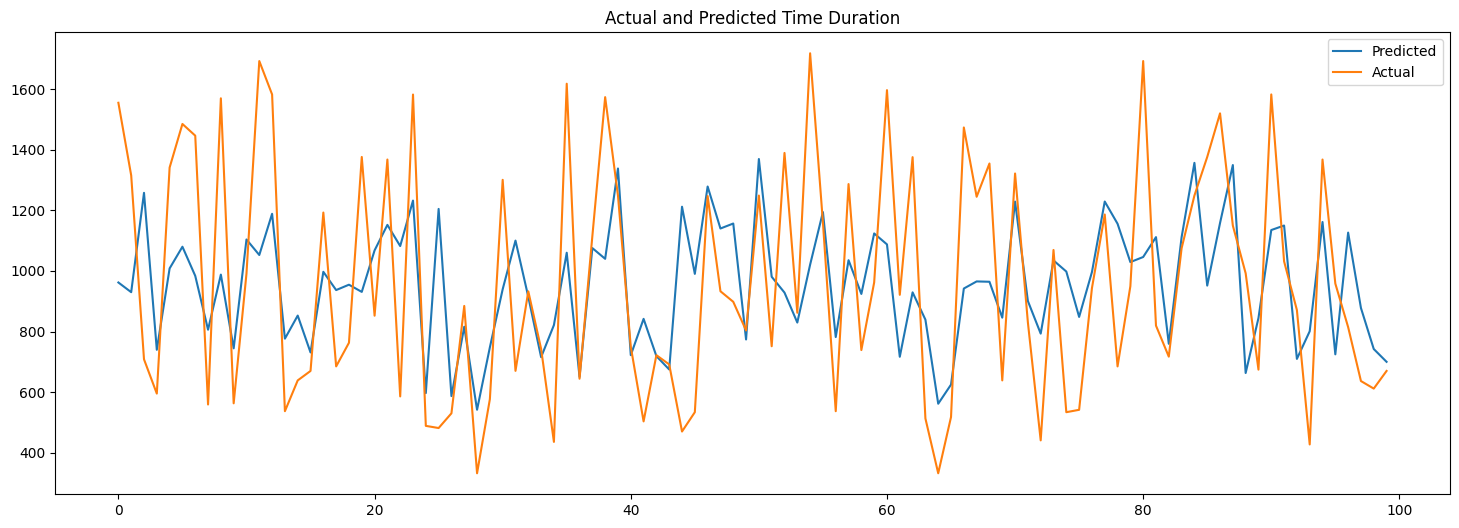

In [183]:
# Visualizing evaluation Metric Score chart
EvaluationMetricChart(y_train,y_pred_lasso_train)

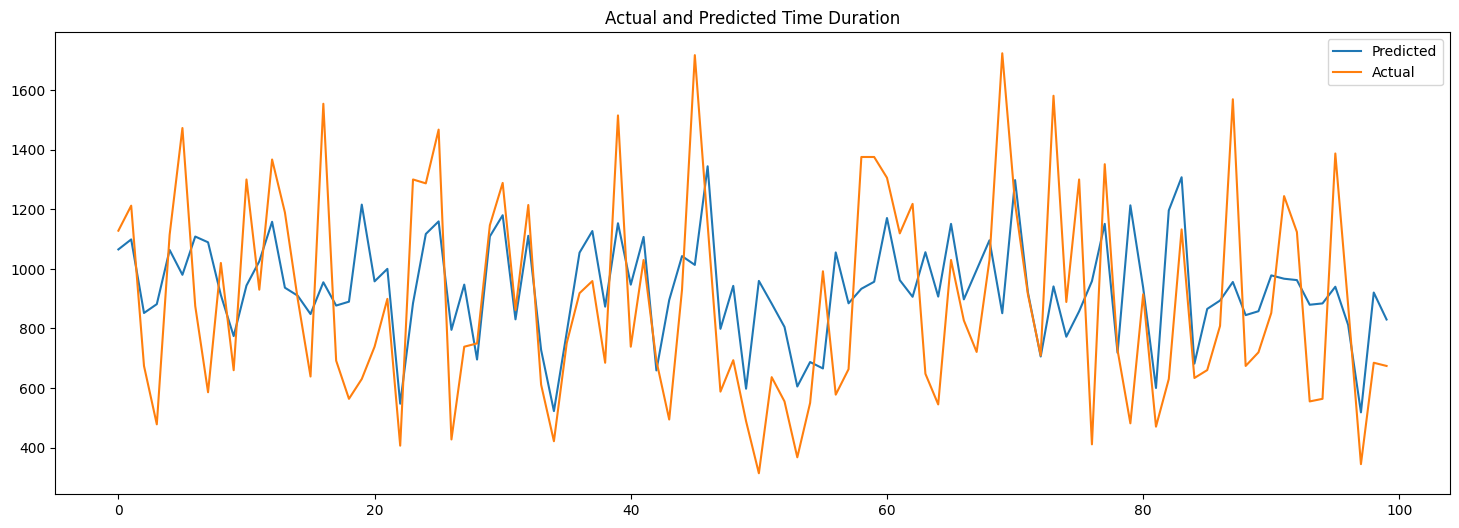

In [184]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lasso_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [185]:
# ML Model - 3 Implementation
ridge= Ridge()
# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}
# Fit the Algorithm
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)
# Predict on the model
y_pred_ridge_train = ridgeR.predict(x_train)
y_pred_ridge_test = ridgeR.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [186]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_ridge_train,y_test,y_pred_ridge_test)

--------------------------------------------------
MAE on train is: 248.6744517274009
MAE on test is: 250.1380881185545
--------------------------------------------------
MSE on train is: 96638.18318268878
MSE on test is: 97548.77461295079
--------------------------------------------------
RMSE on train is: 310.86682547787046
RMSE on test is: 312.32799204194106
--------------------------------------------------
MAPE on train is: 30.234722846742095  %
MAPE on test is: 30.405755062618802  %
--------------------------------------------------
R2 on train is: 0.2624835977859309
R2 on test is: 0.2622140232625696
--------------------------------------------------
Accuracy of train is: 69.7652771532579  %
Accuracy of test is: 69.5942449373812  %
--------------------------------------------------


In [113]:
# Visualizing evaluation Metric Score chart

In [187]:
# ML Model - 4 Implementation
e_net= ElasticNet()
# Defining parameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict on the model
y_pred_e_net_train = e_netR.predict(x_train)
y_pred_e_net_test = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.0001, 'max_iter': 12}
Negative mean square error is: -96644.53379715017


In [188]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_e_net_train,y_test,y_pred_e_net_test)

--------------------------------------------------
MAE on train is: 248.67413214294317
MAE on test is: 250.1377518080401
--------------------------------------------------
MSE on train is: 96638.18306833219
MSE on test is: 97548.76103377175
--------------------------------------------------
RMSE on train is: 310.8668252939387
RMSE on test is: 312.32797030328834
--------------------------------------------------
MAPE on train is: 30.234616174412306  %
MAPE on test is: 30.40564706177279  %
--------------------------------------------------
R2 on train is: 0.2624835986586692
R2 on test is: 0.26221412596532434
--------------------------------------------------
Accuracy of train is: 69.76538382558769  %
Accuracy of test is: 69.59435293822722  %
--------------------------------------------------


In [189]:
# ML Model - 5 Implementation
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1)
lgbmR.fit(x_train, y_train)
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmR_pred= lgbmR.predict(x_test)


# Calculating the regression metrics
regression_metrics(y_train,y_train_lgbmR_pred,y_test,y_test_lgbmR_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 217510, number of used features: 7
[LightGBM] [Info] Start training from score 957.129255
--------------------------------------------------
MAE on train is: 23.36839546130452
MAE on test is: 23.81376342166704
--------------------------------------------------
MSE on train is: 864.0579538289148
MSE on test is: 900.9294379139673
--------------------------------------------------
RMSE on train is: 29.394862711516698
RMSE on test is: 30.01548663463525
--------------------------------------------------
MAPE on train is: 2.660285662251196  %
MAPE on test is: 2.7065662274571305  %
--------------------------------------------------
R2 on train is: 0.9934057440607337
R2 on test is: 0.9931860435155624
---------------------------------------------

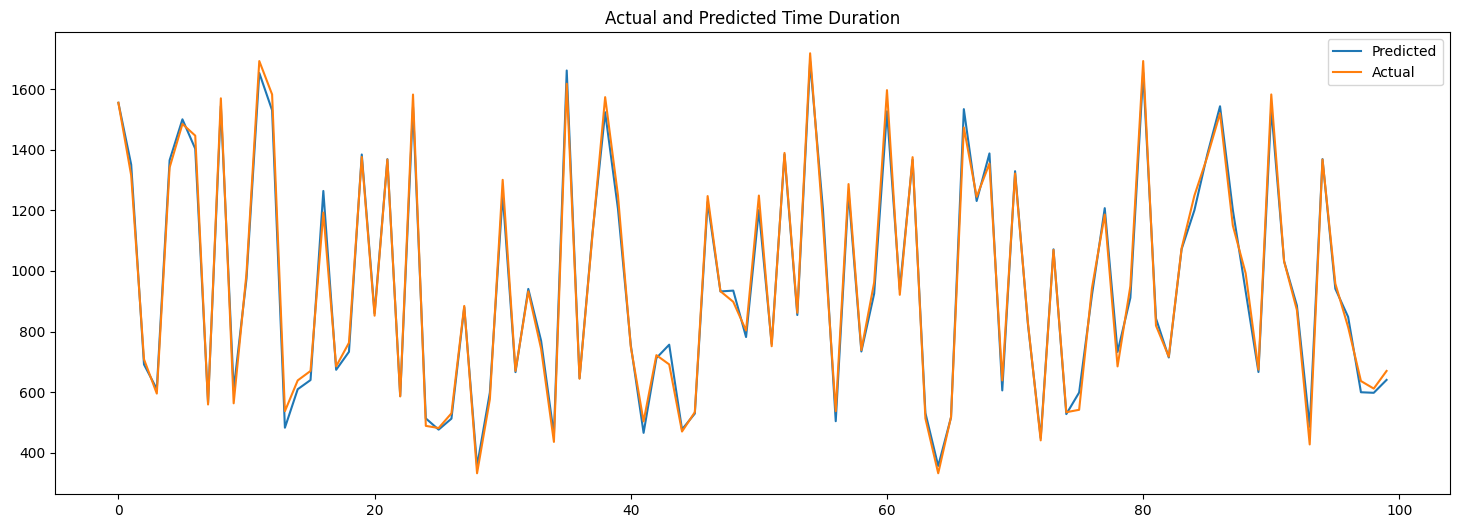

In [190]:
EvaluationMetricChart(y_train,y_train_lgbmR_pred)

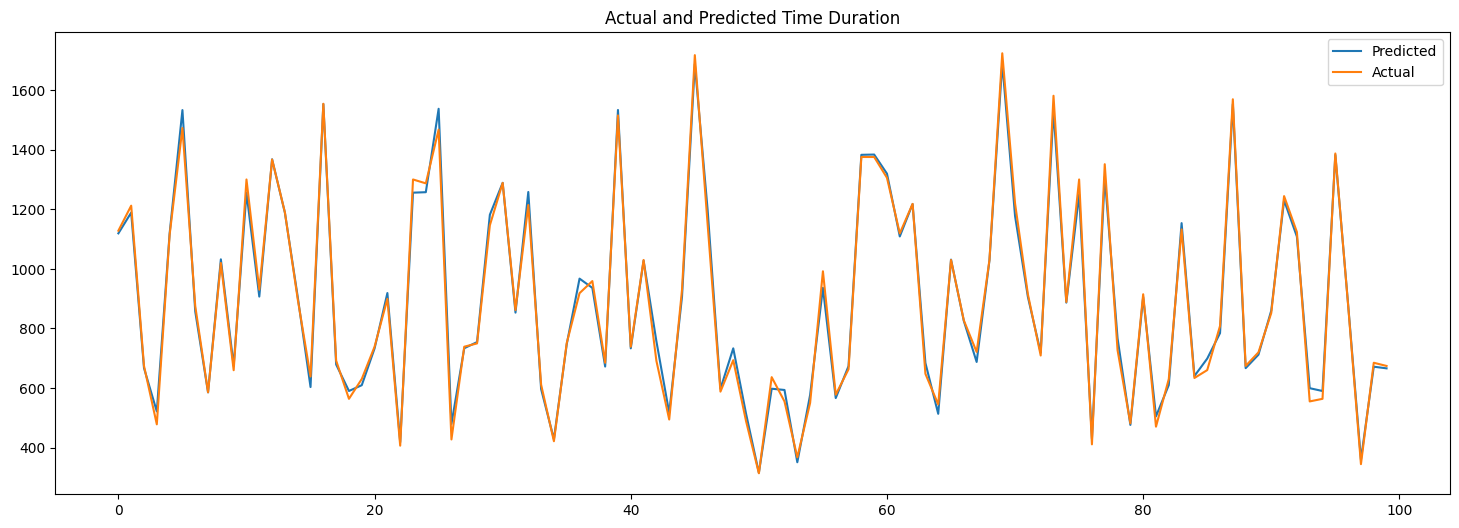

In [191]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_lgbmR_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [192]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 217510, number of used features: 7
[LightGBM] [Info] Start training from score 957.129255
The best alpha value found out to be: {'n_estimators': 500, 'max_depth': 120, 'learning_rate': 0.1}
Negative mean square error is: -906.1028662034128


In [193]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 23.36839546130452
MAE on test is: 23.81376342166704
--------------------------------------------------
MSE on train is: 864.0579538289148
MSE on test is: 900.9294379139673
--------------------------------------------------
RMSE on train is: 29.394862711516698
RMSE on test is: 30.01548663463525
--------------------------------------------------
MAPE on train is: 2.660285662251196  %
MAPE on test is: 2.7065662274571305  %
--------------------------------------------------
R2 on train is: 0.9934057440607337
R2 on test is: 0.9931860435155624
--------------------------------------------------
Accuracy of train is: 97.3397143377488  %
Accuracy of test is: 97.29343377254287  %
--------------------------------------------------


In [194]:
# ML Model - 6 Implementation
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)
xgbR.fit(x_train, y_train)
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)

In [195]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 21.455755304241574
MAE on test is: 23.873136996419664
--------------------------------------------------
MSE on train is: 760.0938700153998
MSE on test is: 932.0354694169623
--------------------------------------------------
RMSE on train is: 27.569799963282286
RMSE on test is: 30.529255959111783
--------------------------------------------------
MAPE on train is: 2.4206437006176253  %
MAPE on test is: 2.715703235622672  %
--------------------------------------------------
R2 on train is: 0.9941991697495081
R2 on test is: 0.9929507807567433
--------------------------------------------------
Accuracy of train is: 97.57935629938237  %
Accuracy of test is: 97.28429676437733  %
--------------------------------------------------


In [196]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,6,8]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=2)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 8}
Negative mean square error is: -904.3207970791769


In [197]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 23.3570168203754
MAE on test is: 23.748710101249443
--------------------------------------------------
MSE on train is: 872.2519108517689
MSE on test is: 899.4433570071665
--------------------------------------------------
RMSE on train is: 29.533911201393035
RMSE on test is: 29.990721181845004
--------------------------------------------------
MAPE on train is: 2.6528357641437643  %
MAPE on test is: 2.699189440457466  %
--------------------------------------------------
R2 on train is: 0.9933432100032383
R2 on test is: 0.9931972831201364
--------------------------------------------------
Accuracy of train is: 97.34716423585624  %
Accuracy of test is: 97.30081055954254  %
--------------------------------------------------


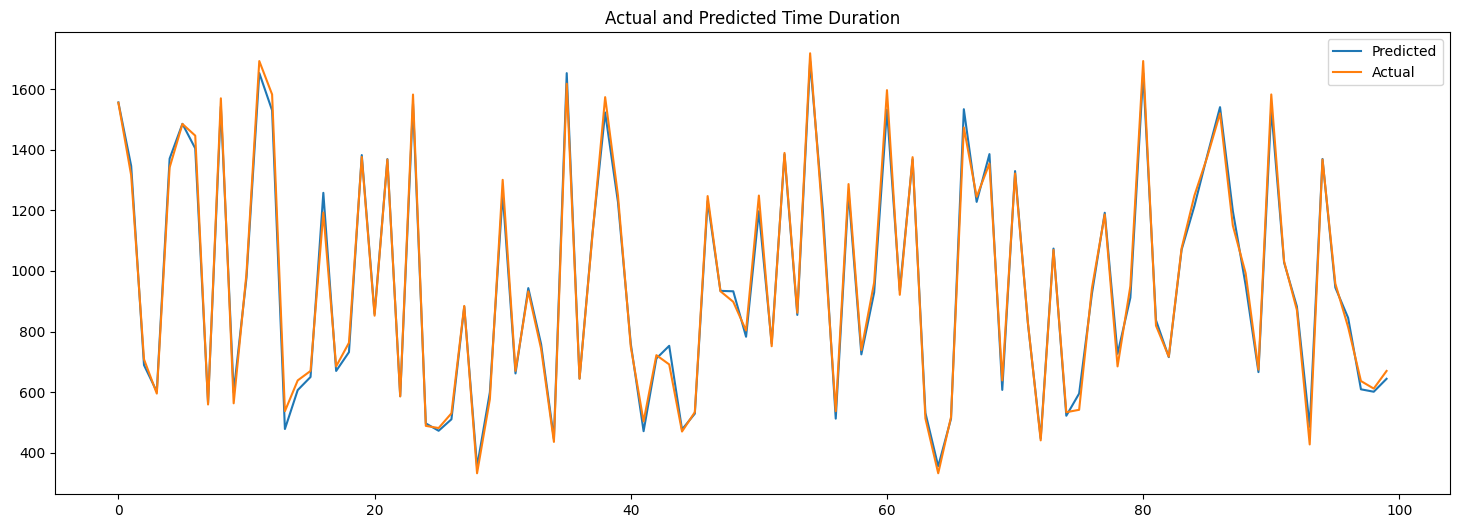

In [198]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_xgbR_pred)

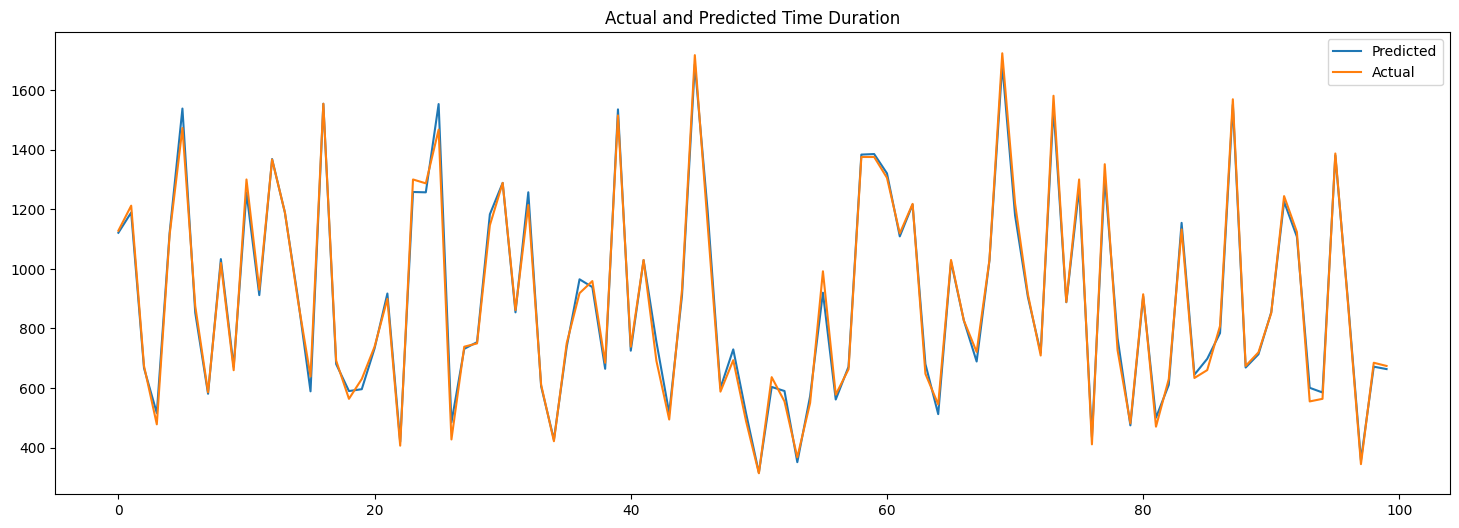

In [199]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_xgbR_pred)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [115]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [116]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***